In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(font_scale=1.56)
import gc

import warnings
warnings.filterwarnings('ignore')
from IPython.core.display import HTML

from scipy import stats
from scipy.stats import norm

In [2]:
%%time

print('Loading data...')

train = pd.read_csv('E-Sun_Credit_Card_Fraud_Data/train.csv', index_col='txkey')
print('\tSuccessfully loaded train_identity!')

test = pd.read_csv('E-Sun_Credit_Card_Fraud_Data/test.csv', index_col='txkey')
print('\tSuccessfully loaded test_identity!')

print('Data was successfully loaded!\n')

Loading data...
	Successfully loaded train_identity!
	Successfully loaded test_identity!
Data was successfully loaded!

Wall time: 3.89 s


In [3]:
train.head()

acqic   bacno    cano    conam  contp  csmcu ecfg  etymd flbmk  \
txkey                                                                     
516056    6881  113261   38038   513.80      5      0    N      0     N   
4376         0  134508   45725   465.62      5      0    N      2     N   
483434    6881   15408  188328   513.80      5      0    N      0     N   
1407164   6716  157159   29967  1016.11      5     62    N      5     N   
1051004   5975  105985   81305   713.66      5     62    N      4     N   

        flg_3dsmk  ...  insfg  iterm locdt     loctm  mcc  mchno  ovrlt  \
txkey              ...                                                    
516056          N  ...      N      0    33  172652.0  457  59333      N   
4376            N  ...      N      0     9  105114.0  451      0      N   
483434          N  ...      N      0     6  152458.0  457  59333      N   
1407164         N  ...      N      0     5  172946.0  247  50436      N   
1051004         N  ...      N      0     6  182129.0  263  93775      N   

         scity stocn  stscd  
txkey                        
516056       0   102      0  
4376      5817   102      0  
483434       0   102      0  
1407164   3281   102      0  
1051004   5817   102      0  

[5 rows x 22 columns]

In [4]:
test.head()

acqic   bacno    cano  conam  contp  csmcu ecfg  etymd flbmk  \
txkey                                                                  
592489   6881  163188  116799  513.8      5      0    N      0     N   
592452   6881  163188  116799  513.8      5      0    N      0     N   
590212   6881  163188  116799  513.8      5      0    N      0     N   
590209   6881  163188  116799  513.8      5      0    N      0     N   
592488   6881  163188  116799  513.8      5      0    N      0     N   

       flg_3dsmk  ...  insfg iterm  locdt     loctm  mcc  mchno  ovrlt scity  \
txkey             ...                                                          
592489         N  ...      N     0    102  215328.0  457  59360      N     0   
592452         N  ...      N     0    102  222007.0  457  59360      N     0   
590212         N  ...      N     0    100  170013.0  457  59360      N     0   
590209         N  ...      N     0    100  165914.0  457  59360      N     0   
592488         N  ...      N     0    102  215311.0  457  59360      N     0   

        stocn  stscd  
txkey                 
592489    102      0  
592452    102      0  
590212    102      0  
590209    102      0  
592488    102      0  

[5 rows x 21 columns]

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1521787 entries, 516056 to 1055258
Data columns (total 22 columns):
acqic        1521787 non-null int64
bacno        1521787 non-null int64
cano         1521787 non-null int64
conam        1521787 non-null float64
contp        1521787 non-null int64
csmcu        1521787 non-null int64
ecfg         1521787 non-null object
etymd        1521787 non-null int64
flbmk        1509206 non-null object
flg_3dsmk    1509206 non-null object
fraud_ind    1521787 non-null int64
hcefg        1521787 non-null int64
insfg        1521787 non-null object
iterm        1521787 non-null int64
locdt        1521787 non-null int64
loctm        1521787 non-null float64
mcc          1521787 non-null int64
mchno        1521787 non-null int64
ovrlt        1521787 non-null object
scity        1521787 non-null int64
stocn        1521787 non-null int64
stscd        1521787 non-null int64
dtypes: float64(2), int64(15), object(5)
memory usage: 267.0+ MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421665 entries, 592489 to 101230
Data columns (total 21 columns):
acqic        421665 non-null int64
bacno        421665 non-null int64
cano         421665 non-null int64
conam        421665 non-null float64
contp        421665 non-null int64
csmcu        421665 non-null int64
ecfg         421665 non-null object
etymd        421665 non-null int64
flbmk        417950 non-null object
flg_3dsmk    417950 non-null object
hcefg        421665 non-null int64
insfg        421665 non-null object
iterm        421665 non-null int64
locdt        421665 non-null int64
loctm        421665 non-null float64
mcc          421665 non-null int64
mchno        421665 non-null int64
ovrlt        421665 non-null object
scity        421665 non-null int64
stocn        421665 non-null int64
stscd        421665 non-null int64
dtypes: float64(2), int64(14), object(5)
memory usage: 70.8+ MB


In [7]:
train['flbmk'] = train['flbmk'].fillna('Nan')
train['flg_3dsmk'] = train['flg_3dsmk'].fillna('Nan')
test['flbmk'] = test['flbmk'].fillna('Nan')
test['flg_3dsmk'] = test['flg_3dsmk'].fillna('Nan')

In [8]:
check_null = train.isnull().sum()
check_null[check_null>0].sort_values(ascending=False)

Series([], dtype: int64)

In [9]:
check_null = test.isnull().sum()
check_null[check_null>0].sort_values(ascending=False)

Series([], dtype: int64)

In [10]:
def count_unique(input_data, uniques):
    for patch, uniq in zip(input_data.patches, uniques):
        height = patch.get_height()
        input_data.text(patch.get_x()+patch.get_width()/2.,
                        height + 10,
                        uniq,
                        ha="center")

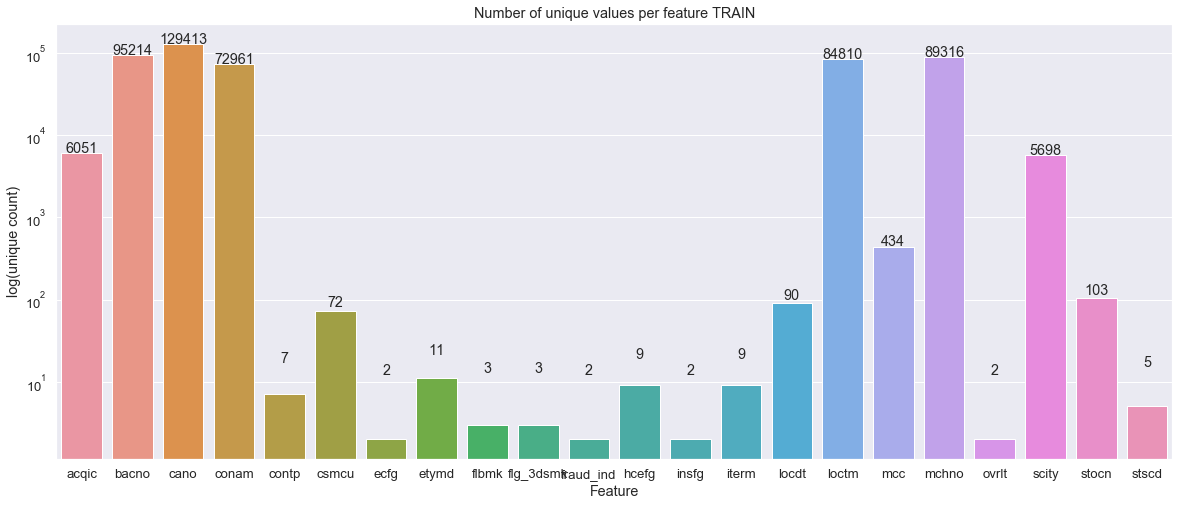

In [11]:
plt.figure(figsize=(20, 8))
all_features = list(train.columns)
uniques = [len(train[col].unique()) for col in all_features]
sns.set(font_scale=1.2)
all_feat = sns.barplot(all_features, uniques, log=True)
all_feat.set(xlabel='Feature', ylabel='log(unique count)', title='Number of unique values per feature TRAIN')
count_unique(all_feat, uniques)

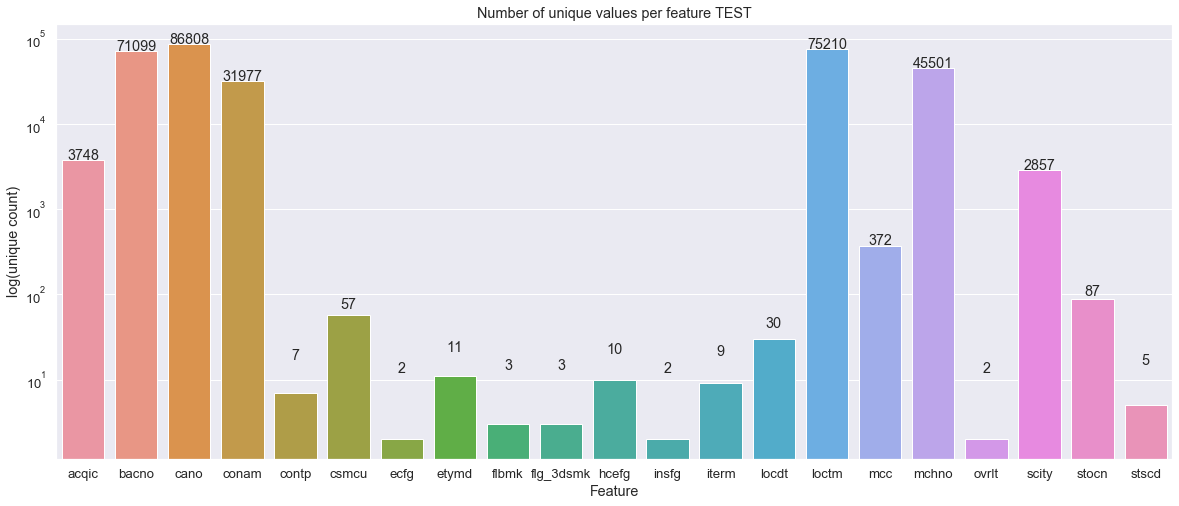

In [12]:
plt.figure(figsize=(20, 8))
all_features = list(test.columns)
uniques = [len(test[col].unique()) for col in all_features]
sns.set(font_scale=1.2)
all_feat = sns.barplot(all_features, uniques, log=True)
all_feat.set(xlabel='Feature', ylabel='log(unique count)', title='Number of unique values per feature TEST')
count_unique(all_feat, uniques)

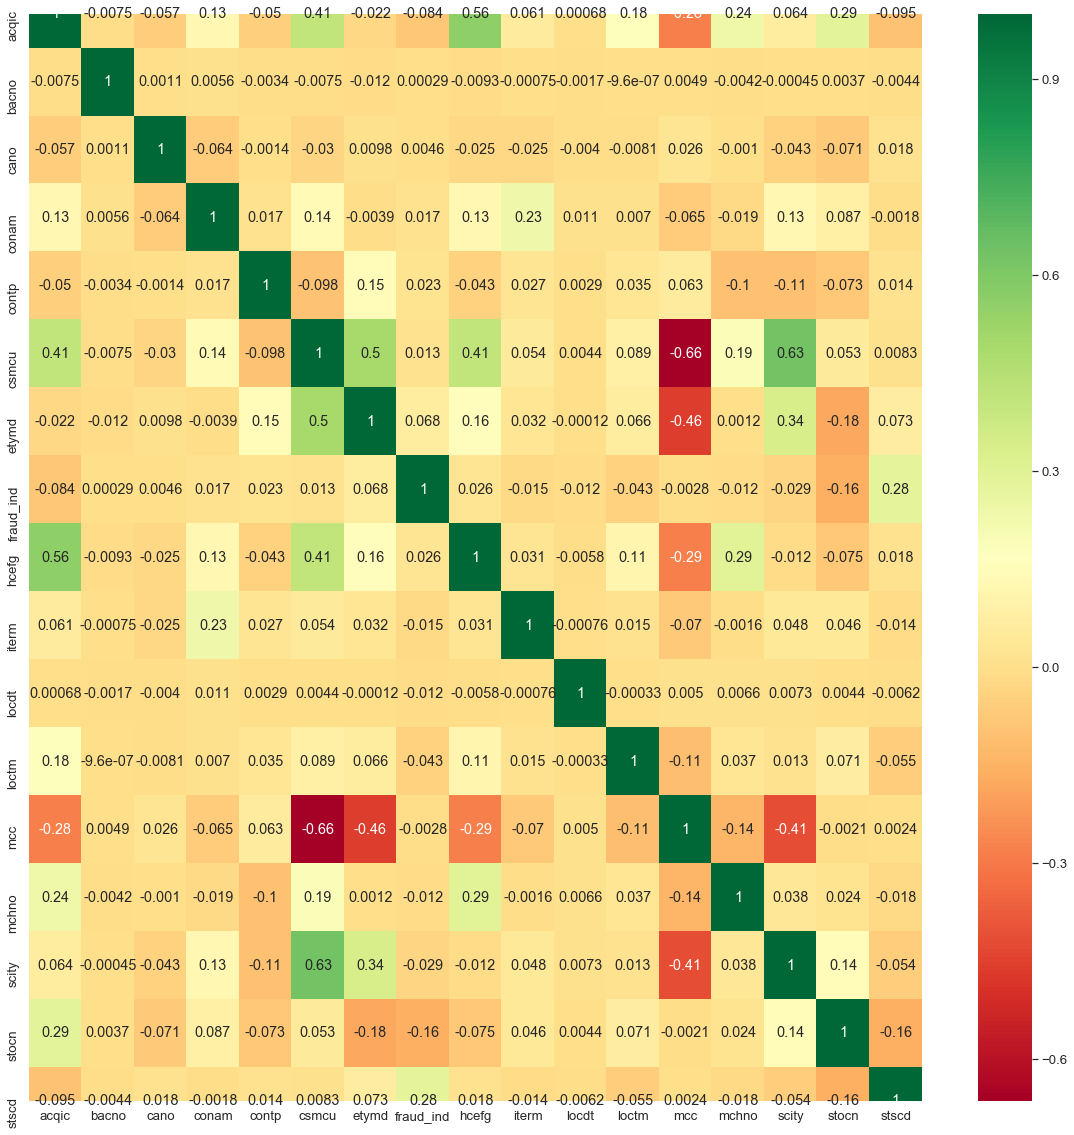

In [13]:
#Use heatmap
corrmat = train.corr()
top_corr_features = corrmat.index[abs(corrmat["fraud_ind"])>=0]
plt.figure(figsize=(20,20))
g = sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [14]:
def GetPercentage(input_data):
    for patch in input_data.patches:
        height = patch.get_height()
        input_data.text(patch.get_x()+patch.get_width()/2.,
                        height + 3,
                        '{:1.2f}%'.format(height/(len(train))*100),
                        ha="center", fontsize=10)

In [15]:
def compare_cate(df,colname,targetname):
    # caculate aggregate stats
    df_cate = df.groupby([colname])[targetname].agg(['count', 'sum','mean'])
    df_cate.reset_index(inplace=True)
    print(df_cate)
    
    # plot visuals
    f, ax = plt.subplots(figsize=(15, 6))
    ax.tick_params(axis='x',labelrotation=90)
    plt1 = sns.lineplot(x=colname, y="mean", data=df_cate,color="r")

    for tl in ax.get_yticklabels():
        tl.set_color('r')

    ax2 = ax.twinx()
    plt2 = sns.barplot(x=colname, y="count", data=df_cate,
                       ax=ax2,alpha=0.5)

In [16]:
COLS_TO_SHOW = 22
included_cols = list(train.columns.values[:COLS_TO_SHOW])

def corr1(col):
    N = None
    num_vars = [f for f in train.columns if train[f].dtype != 'object']
    trx = train.head(N) if N is not None else train.copy()
    corrs = trx[num_vars].corrwith(trx[col]).reset_index().sort_values(0, ascending=False).reset_index(drop=True).rename({'index':'Column',0:'Correlation with ' + col}, axis=1)
    h('<b>Most correlated values with ' + col + ':</b>')
    trx = pd.concat([corrs.head(6), corrs.dropna().tail(5)])
    def linkx(val):
        return '<a href="#c_{}">{}</a>'.format(val, val) if val in included_cols else val
    trx['Column'] = trx['Column'].apply(linkx)
    h(trx.to_html(escape=False))
    
def h(content):
    display(HTML(content))

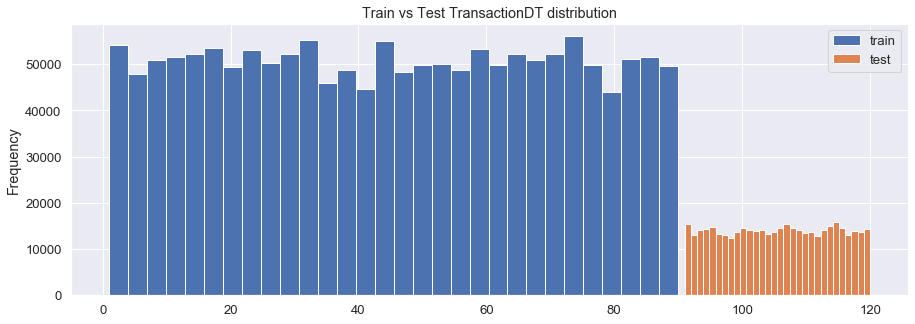

In [17]:
train['locdt'].plot(kind='hist',
                    figsize=(15, 5),
                    label='train',
                    bins=30,
                    title='Train vs Test TransactionDT distribution')
test['locdt'].plot(kind='hist',
                   label='test',
                   bins=30)
plt.legend()
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


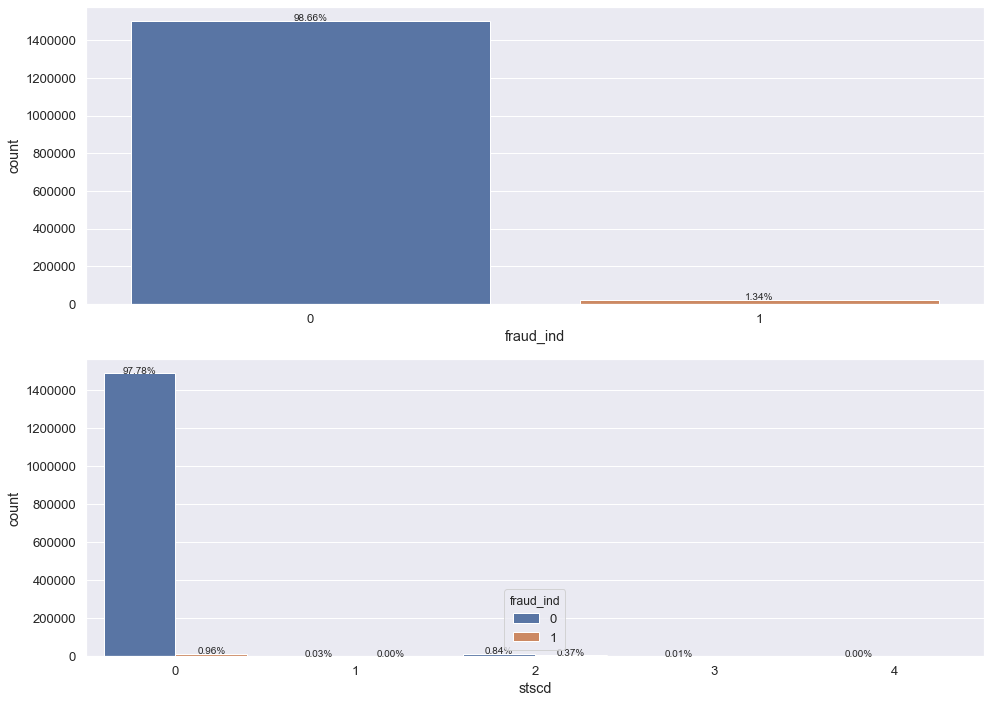

In [18]:
fig, axes = plt.subplots(2, 1, figsize=(14, 10))
fraud_ind = sns.countplot(x='fraud_ind', data=train, ax=axes[0])
GetPercentage(fraud_ind)
stscd = sns.countplot(x='stscd', data=train, hue=train['fraud_ind'], ax=axes[1])
GetPercentage(stscd)
plt.tight_layout()

In [19]:
corr1('fraud_ind')

In [20]:
corr1('stscd')

   stscd    count    sum      mean
0      0  1502745  14679  0.009768
1      1      408     25  0.061275
2      2    18506   5651  0.305360
3      3      108      0  0.000000
4      4       20      0  0.000000


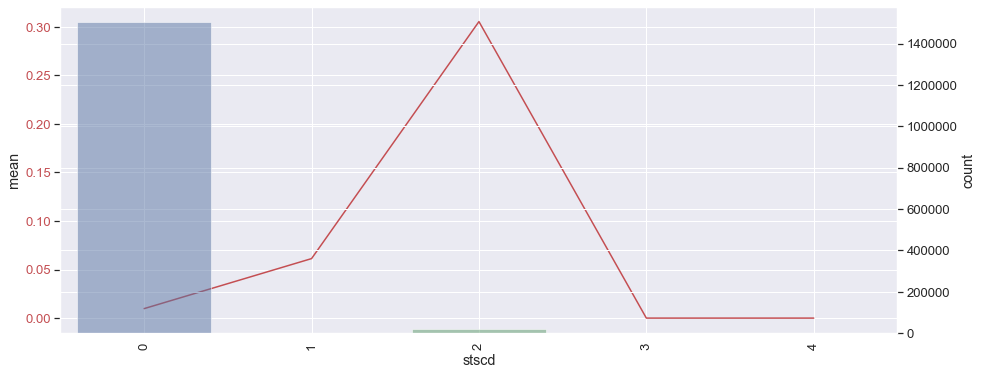

In [21]:
compare_cate(train,'stscd','fraud_ind')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


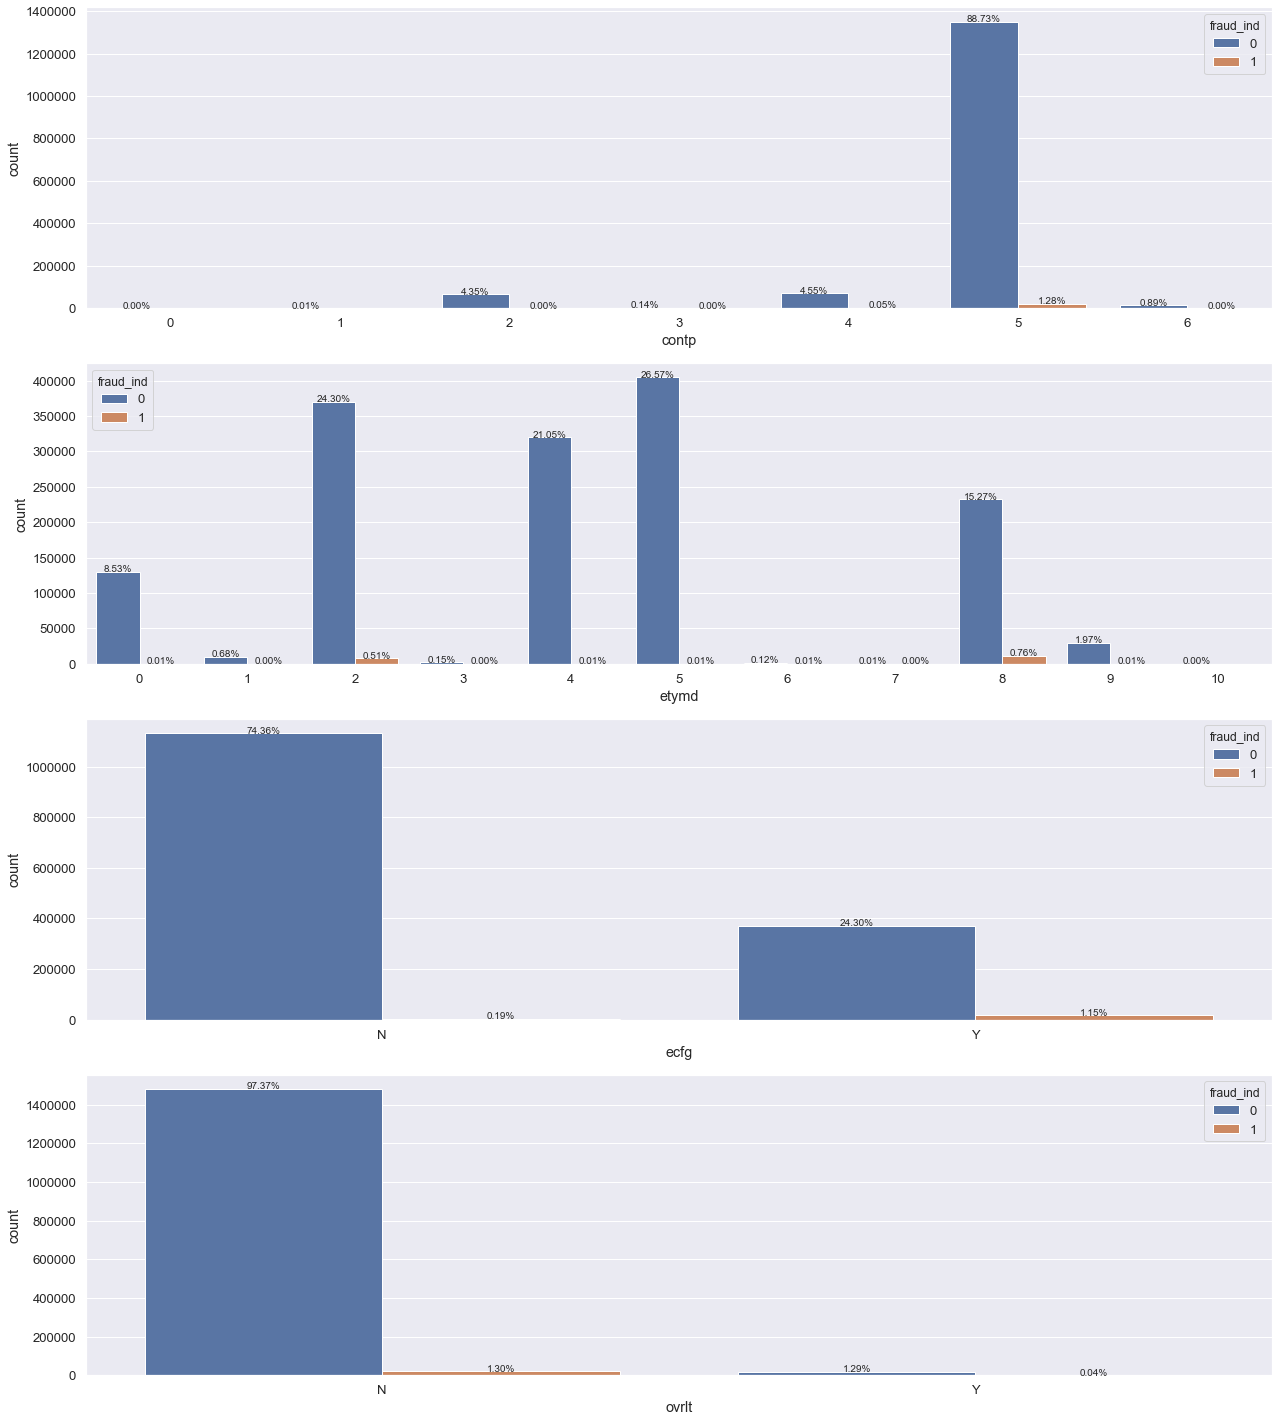

In [22]:
fig, axes = plt.subplots(4, 1, figsize=(18, 20))
contp = sns.countplot(x='contp', data=train, hue=train['fraud_ind'], ax=axes[0])
GetPercentage(contp)
etymd = sns.countplot(x='etymd', data=train, hue=train['fraud_ind'], ax=axes[1])
GetPercentage(etymd)
ecfg = sns.countplot(x='ecfg', data=train, hue=train['fraud_ind'], ax=axes[2])
GetPercentage(ecfg)
ovrlt = sns.countplot(x='ovrlt', data=train, hue=train['fraud_ind'], ax=axes[3])
GetPercentage(ovrlt)
plt.tight_layout()

In [23]:
corr1('contp')

In [24]:
corr1('etymd')

   contp    count    sum      mean
0      0       44      0  0.000000
1      1       84      0  0.000000
2      2    66147      8  0.000121
3      3     2148     14  0.006518
4      4    69965    777  0.011106
5      5  1369806  19553  0.014274
6      6    13593      3  0.000221


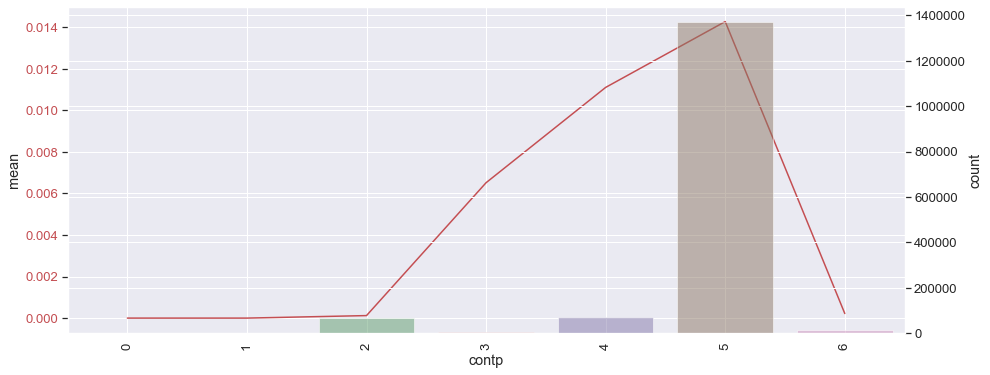

In [25]:
compare_cate(train,'contp','fraud_ind')

    etymd   count    sum      mean
0       0  130022    183  0.001407
1       1   10339     23  0.002225
2       2  377669   7804  0.020664
3       3    2350     17  0.007234
4       4  320502    175  0.000546
5       5  404611    203  0.000502
6       6    1978    145  0.073306
7       7     228     67  0.293860
8       8  243995  11568  0.047411
9       9   30076    170  0.005652
10     10      17      0  0.000000


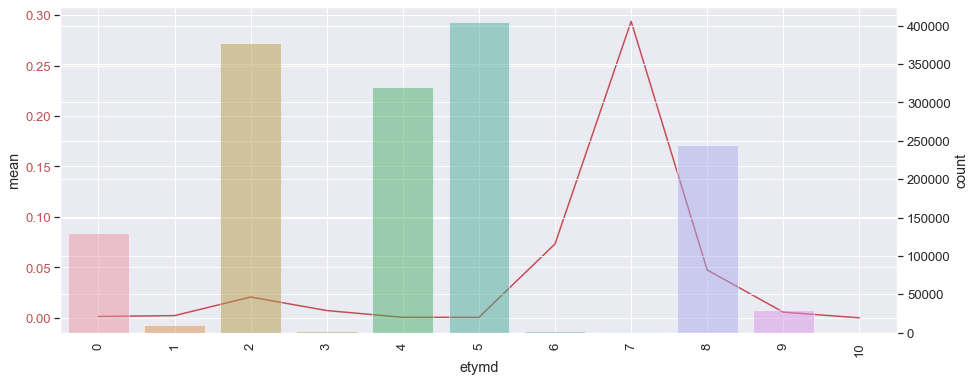

In [26]:
compare_cate(train,'etymd','fraud_ind')

  ecfg    count    sum      mean
0    N  1134512   2862  0.002523
1    Y   387275  17493  0.045169


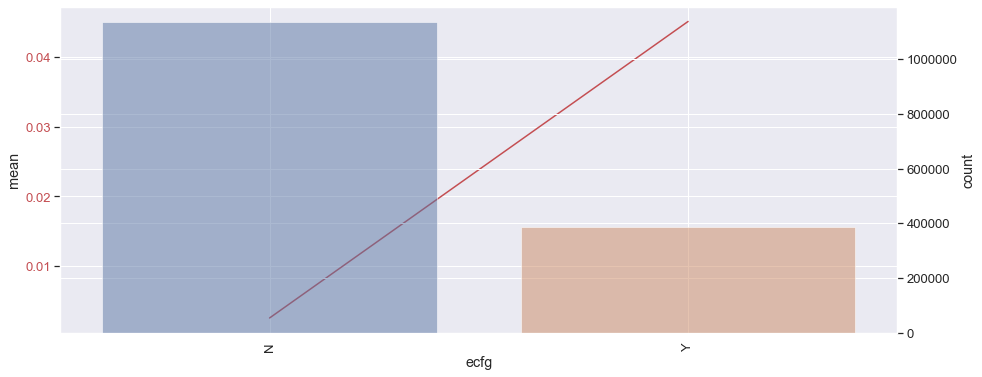

In [27]:
compare_cate(train,'ecfg','fraud_ind')

  ovrlt    count    sum      mean
0     N  1501536  19720  0.013133
1     Y    20251    635  0.031356


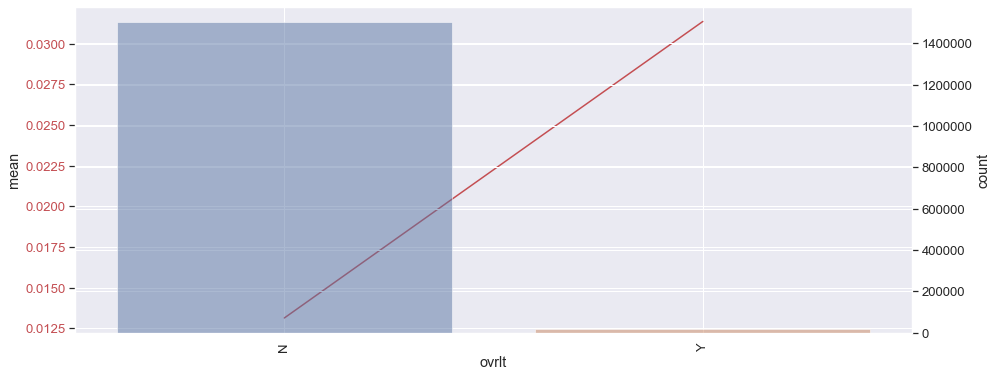

In [28]:
compare_cate(train,'ovrlt','fraud_ind')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


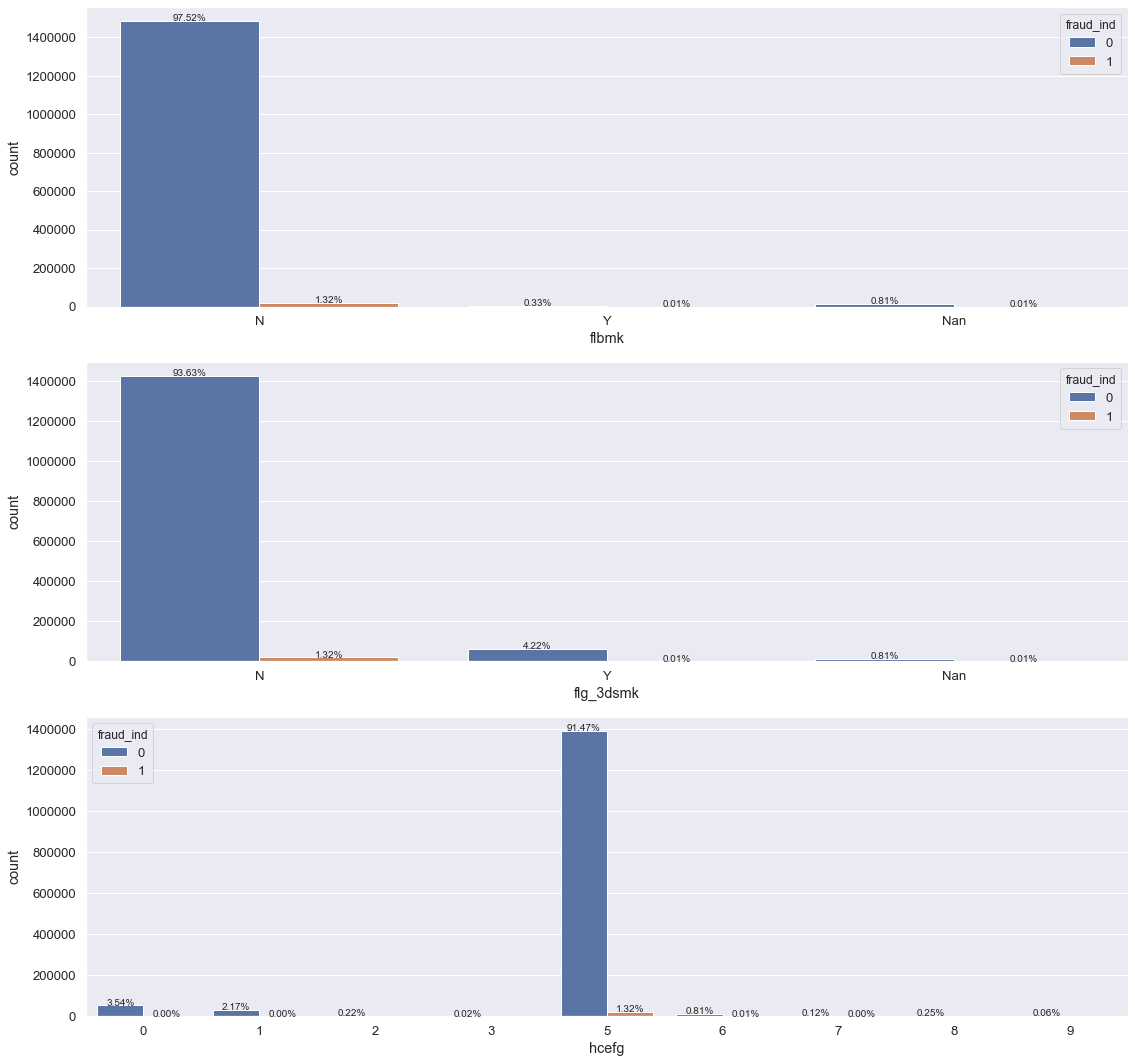

In [29]:
fig, axes = plt.subplots(3, 1, figsize=(16, 15))
flbmk = sns.countplot(x='flbmk', data=train, hue=train['fraud_ind'], ax=axes[0])
GetPercentage(flbmk)
flg_3dsmk = sns.countplot(x='flg_3dsmk', data=train, hue=train['fraud_ind'], ax=axes[1])
GetPercentage(flg_3dsmk)
hcefg = sns.countplot(x='hcefg', data=train, hue=train['fraud_ind'], ax=axes[2])
GetPercentage(hcefg)
plt.tight_layout()

In [30]:
corr1('hcefg')

  flbmk    count    sum      mean
0     N  1504133  20073  0.013345
1   Nan    12581    195  0.015500
2     Y     5073     87  0.017150


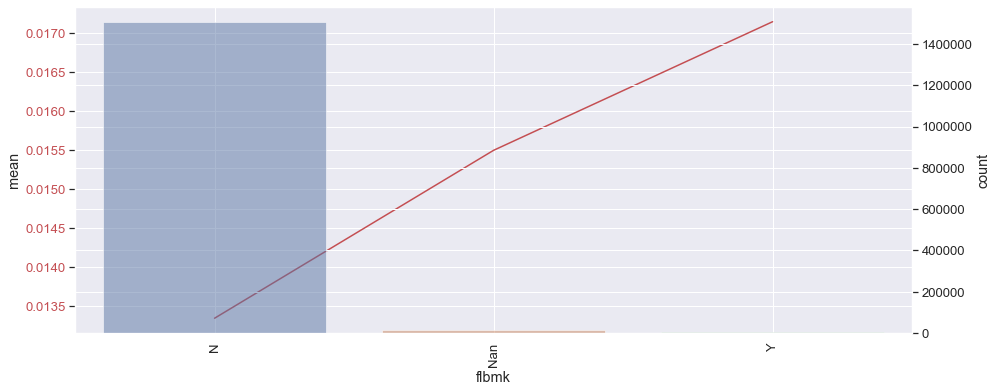

In [31]:
compare_cate(train,'flbmk','fraud_ind')

  flg_3dsmk    count    sum      mean
0         N  1444867  20060  0.013884
1       Nan    12581    195  0.015500
2         Y    64339    100  0.001554


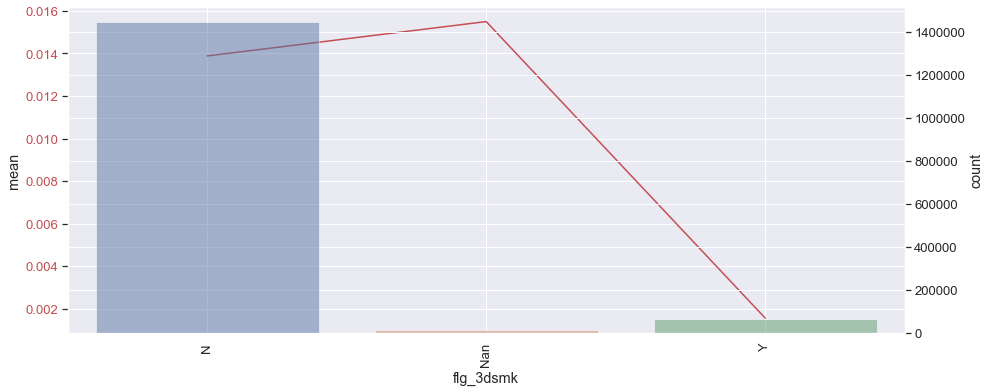

In [32]:
compare_cate(train,'flg_3dsmk','fraud_ind')

   hcefg    count    sum      mean
0      0    53925     21  0.000389
1      1    33055     26  0.000787
2      2     3365      0  0.000000
3      3      313      0  0.000000
4      5  1412039  20109  0.014241
5      6    12581    195  0.015500
6      7     1788      4  0.002237
7      8     3820      0  0.000000
8      9      901      0  0.000000


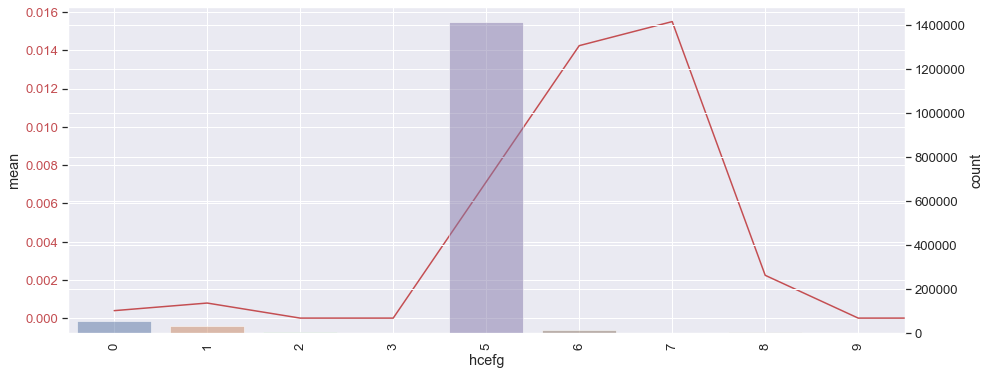

In [33]:
compare_cate(train,'hcefg','fraud_ind')

In [34]:
def compare_distribution(df,colname,targetname,targetdict):
    plt.figure(figsize=(12,5))
    keys = list(targetdict.keys())
    plt1 = sns.distplot(df[df[targetname] == keys[0]][colname].dropna(), label=targetdict[keys[0]])
    plt1 = sns.distplot(df[df[targetname] == keys[1]][colname].dropna(), label=targetdict[keys[1]])
    plt1.legend()
    plt1.set_title("%s Distribution by Target"%colname, fontsize=20)
    plt1.set_xlabel(colname, fontsize=18)
    plt1.set_ylabel("Probability", fontsize=18)
    
dict= {1:'Fraud',0:'NoFraud'}

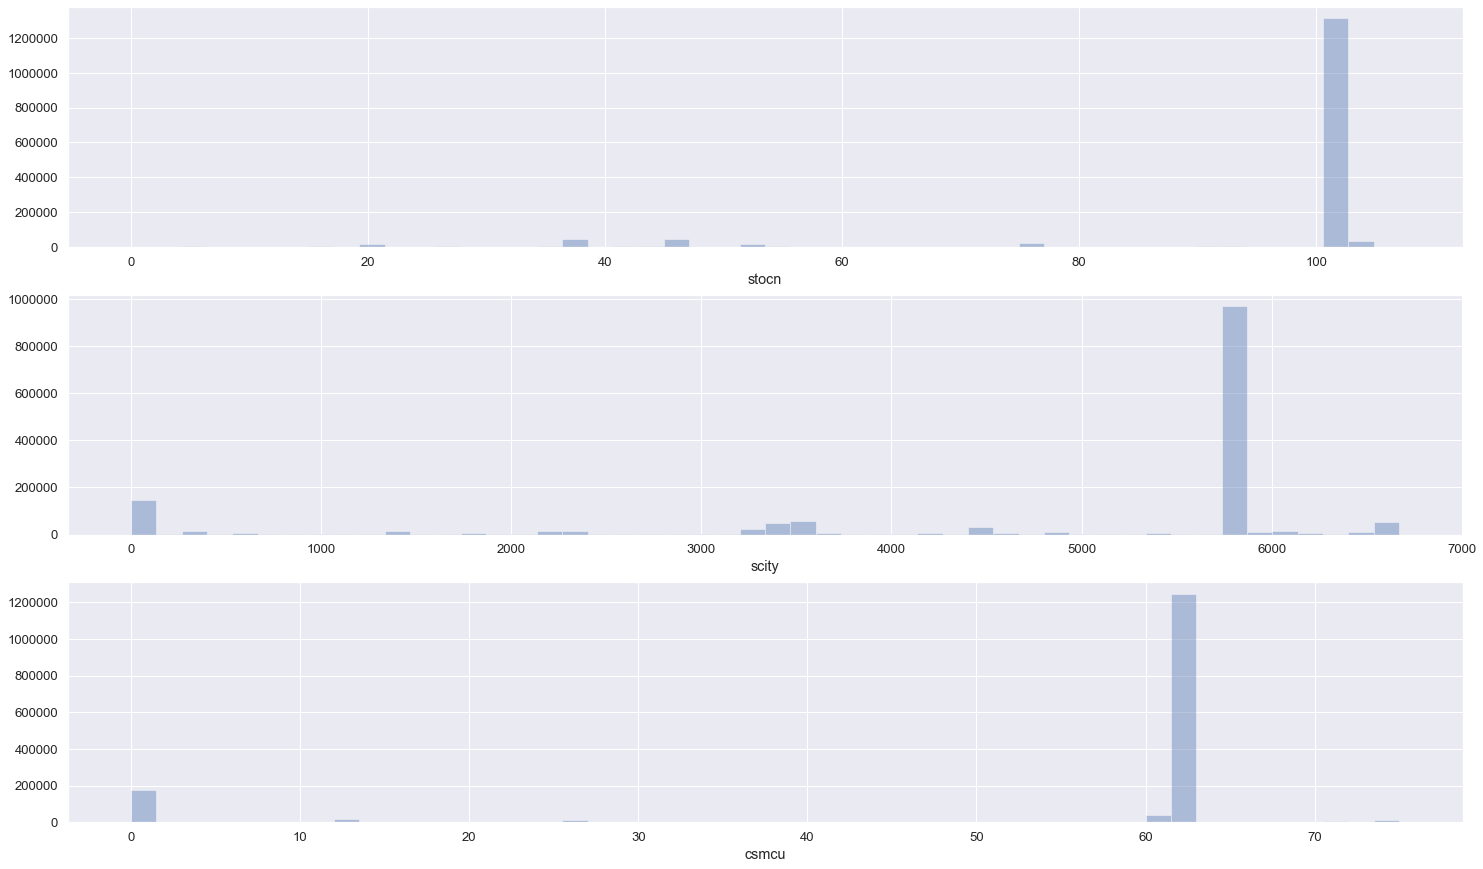

In [35]:
fig, axes = plt.subplots(3, 1, figsize=(25, 15))
stocn = sns.distplot(train.stocn, kde=False, ax=axes[0])
scity = sns.distplot(train.scity, kde=False, ax=axes[1])
csmcu = sns.distplot(train.csmcu, kde=False, ax=axes[2])

In [36]:
corr1('stocn')

In [37]:
corr1('scity')

In [38]:
corr1('csmcu')

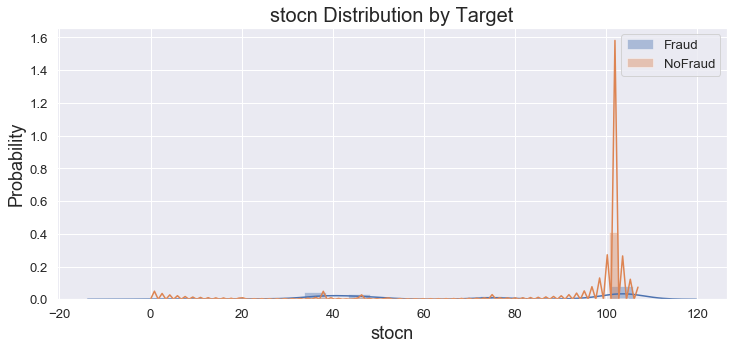

In [39]:
compare_distribution(train,'stocn','fraud_ind',dict)

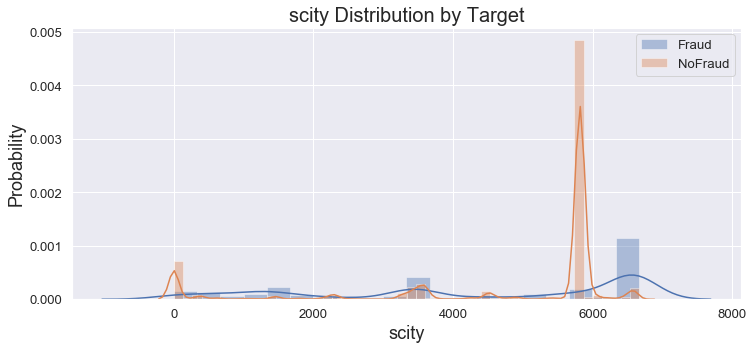

In [40]:
compare_distribution(train,'scity','fraud_ind',dict)

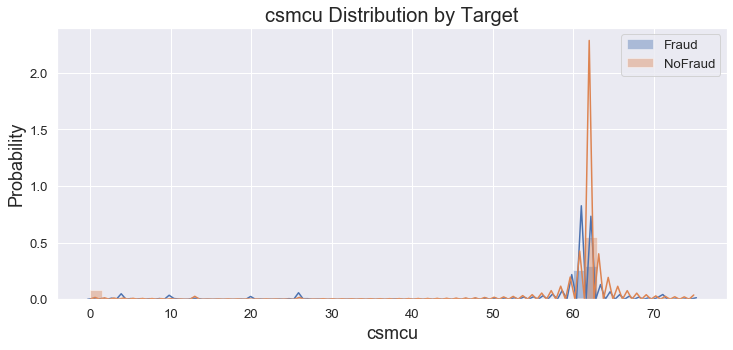

In [41]:
compare_distribution(train,'csmcu','fraud_ind',dict)

In [42]:
train.stocn.value_counts()

102    1313475
38       44311
46       41677
104      33496
75       20128
        ...   
12           1
59           1
86           1
24           1
88           1
Name: stocn, Length: 103, dtype: int64

In [43]:
train.scity.value_counts()

5817    726446
0       143244
5820     86415
5800     46555
6580     41179
         ...  
4377         1
503          1
3355         1
1883         1
311          1
Name: scity, Length: 5698, dtype: int64

In [44]:
train.csmcu.value_counts()

62    1246042
0      176278
61      34160
13      17376
75      12581
       ...   
55          1
46          1
69          1
34          1
57          1
Name: csmcu, Length: 72, dtype: int64

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


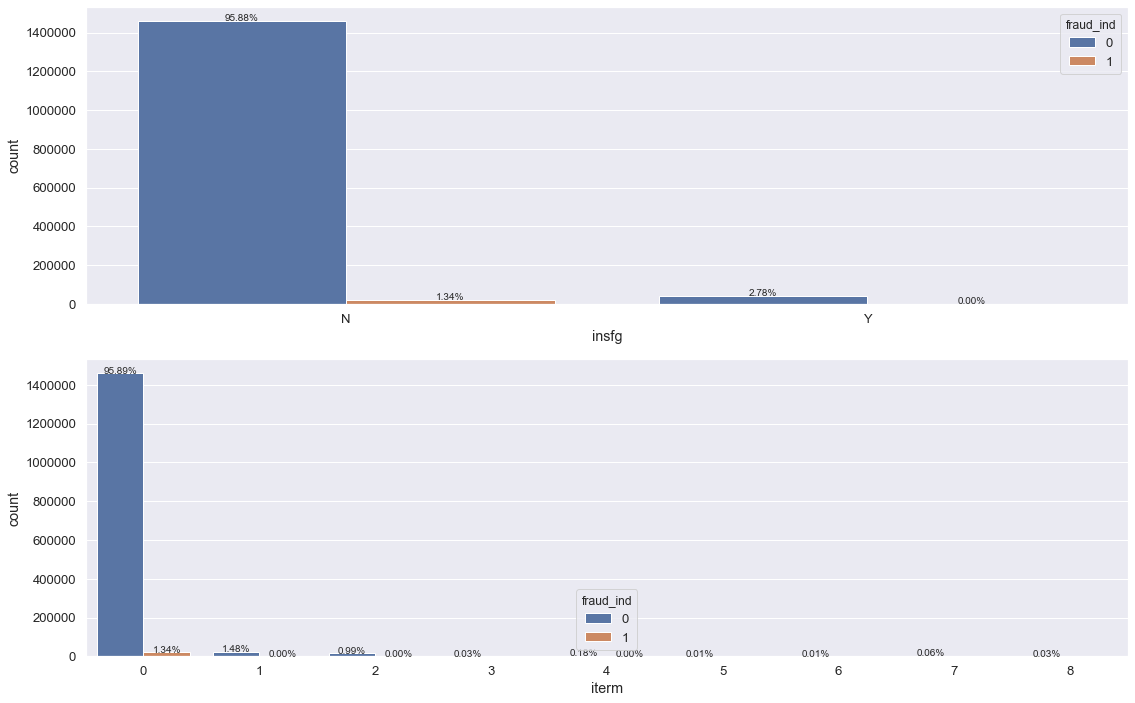

In [45]:
fig, axes = plt.subplots(2, 1, figsize=(16, 10))
insfg = sns.countplot(x='insfg', data=train, hue=train['fraud_ind'], ax=axes[0])
GetPercentage(insfg)
iterm = sns.countplot(x='iterm', data=train, hue=train['fraud_ind'], ax=axes[1])
GetPercentage(iterm)
plt.tight_layout()

  insfg    count    sum      mean
0     N  1479475  20318  0.013733
1     Y    42312     37  0.000874


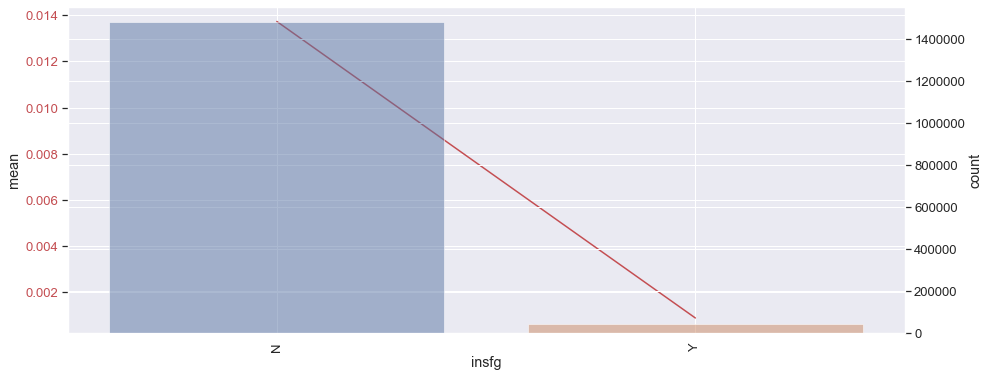

In [46]:
compare_cate(train,'insfg','fraud_ind')

   iterm    count    sum      mean
0      0  1479498  20318  0.013733
1      1    22590      2  0.000089
2      2    15045     34  0.002260
3      3      448      0  0.000000
4      4     2686      1  0.000372
5      5       77      0  0.000000
6      6      160      0  0.000000
7      7      854      0  0.000000
8      8      429      0  0.000000


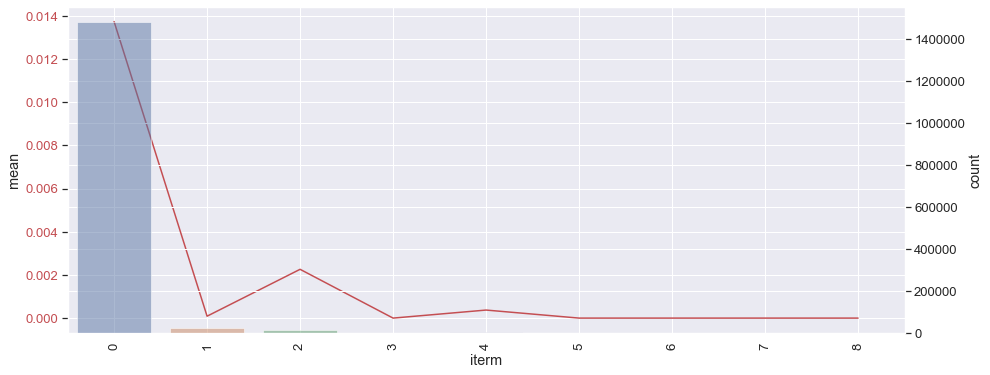

In [47]:
compare_cate(train,'iterm','fraud_ind')

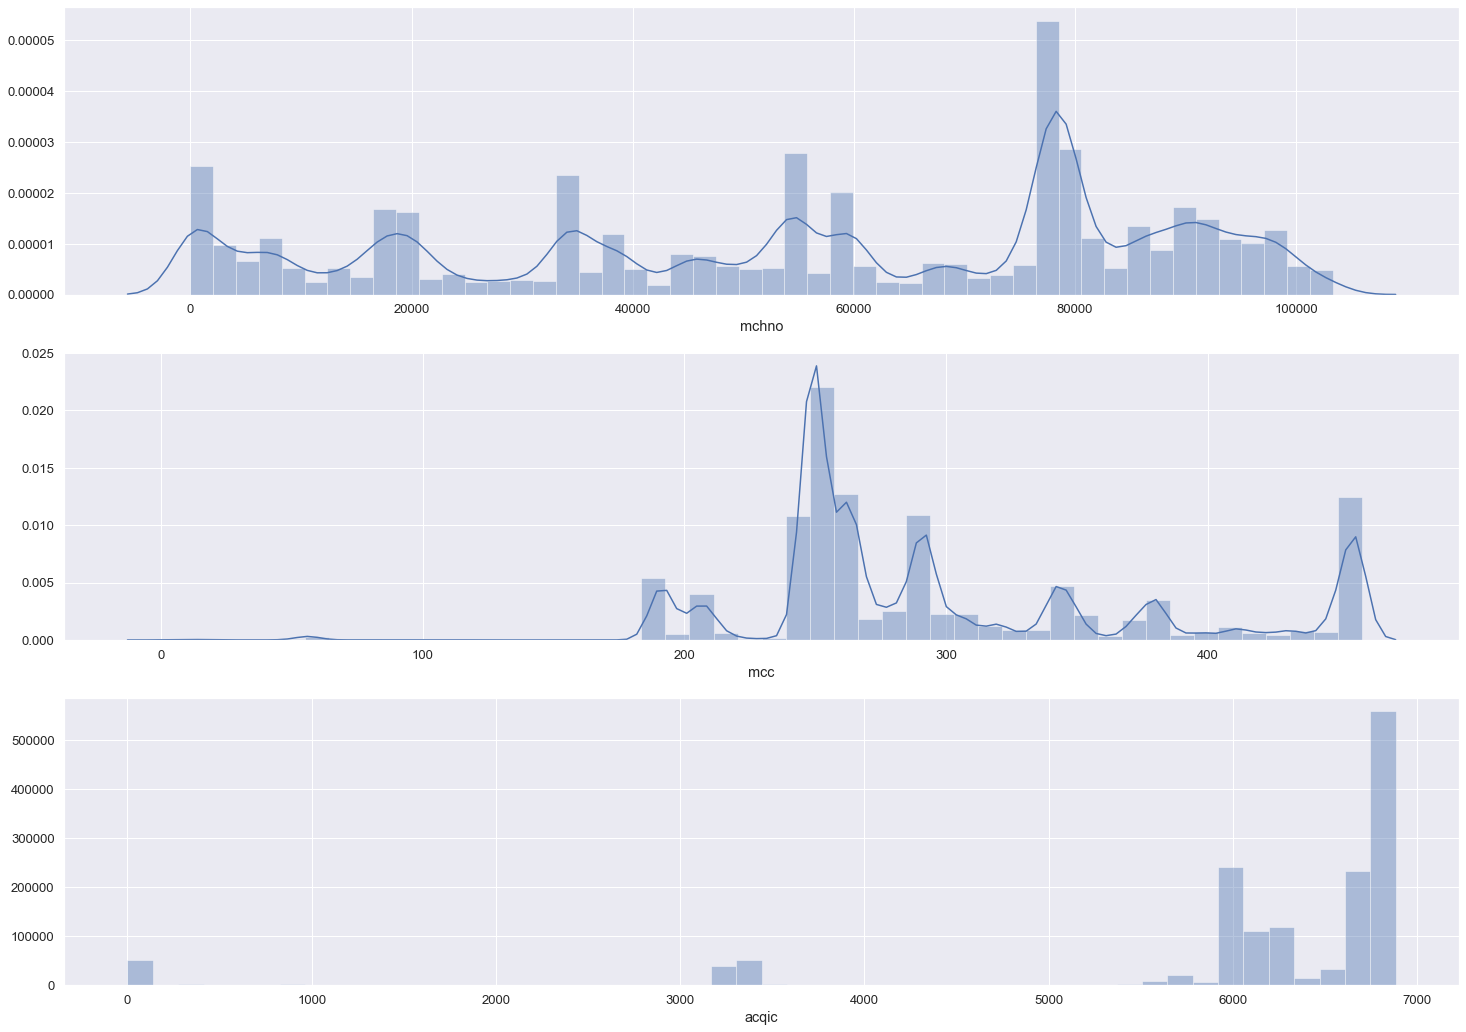

In [48]:
fig, axes = plt.subplots(3, 1, figsize=(25, 18))
mchno = sns.distplot(train.mchno, ax=axes[0])
mcc = sns.distplot(train.mcc, ax=axes[1])
acqic = sns.distplot(train.acqic, kde=False, ax=axes[2])

In [49]:
corr1('mchno')

In [50]:
corr1('mcc')

In [51]:
corr1('acqic')

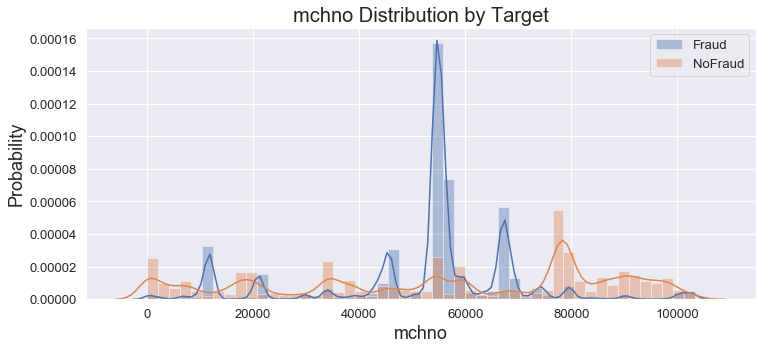

In [52]:
compare_distribution(train,'mchno','fraud_ind',dict)

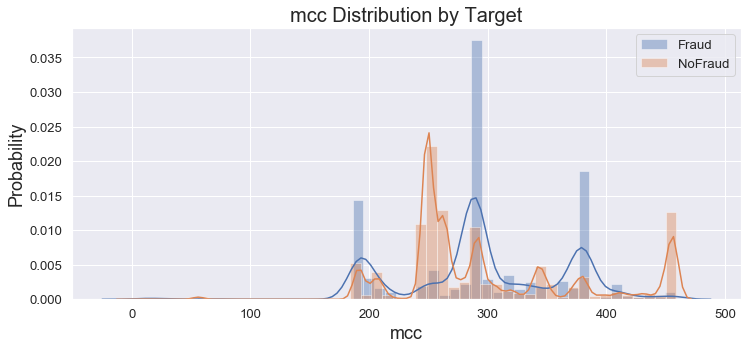

In [53]:
compare_distribution(train,'mcc','fraud_ind',dict)

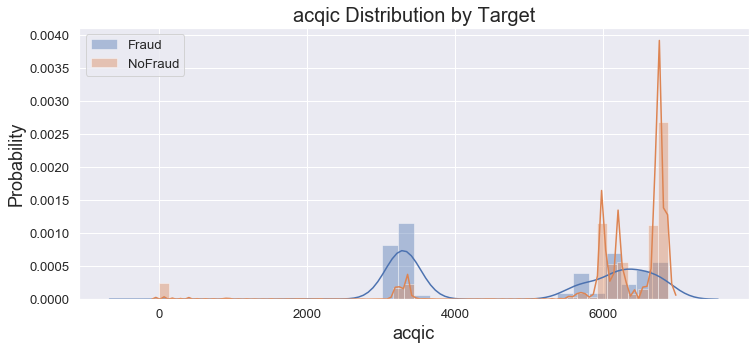

In [54]:
compare_distribution(train,'acqic','fraud_ind',dict)

In [55]:
train.mchno.value_counts()

0        49872
54828    38265
54238    36795
59333    32287
86584    20387
         ...  
28197        1
99864        1
73227        1
71178        1
57826        1
Name: mchno, Length: 89316, dtype: int64

In [56]:
train.mcc.value_counts()

251    193332
247    141106
263    108297
457    103307
292     74036
        ...  
95          1
165         1
163         1
56          1
439         1
Name: mcc, Length: 434, dtype: int64

In [57]:
train.acqic.value_counts()

6769    250889
6716    201407
5975    124951
6881     99348
6189     91434
         ...  
4550         1
451          1
3523         1
450          1
3559         1
Name: acqic, Length: 6051, dtype: int64

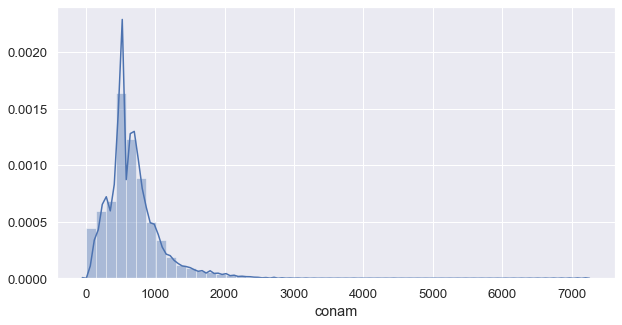

In [58]:
# Check amount distribution
plt.figure(figsize=(10, 5))
conam = sns.distplot(train.conam)


 mu = 6.13 and sigma = 1.32



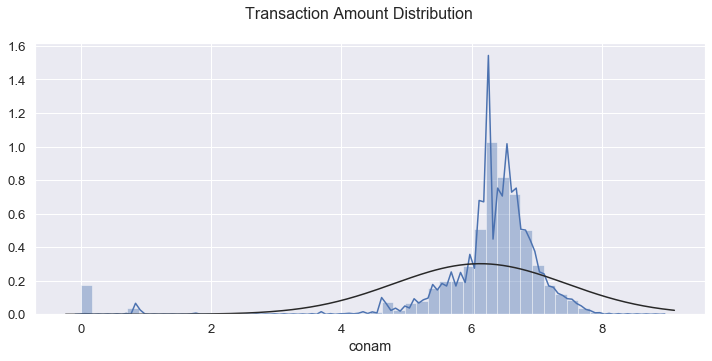

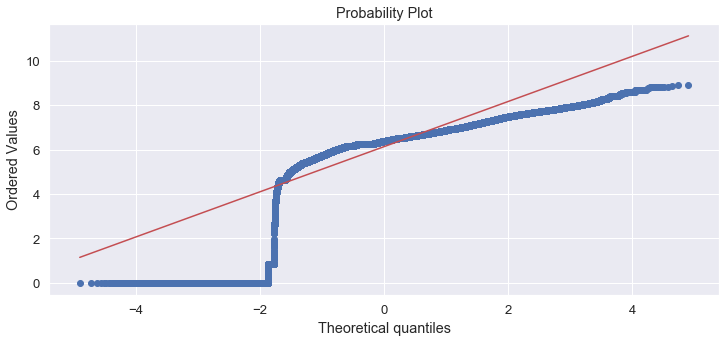

In [59]:
fig = plt.figure(figsize=(12, 5))
fig.suptitle('Transaction Amount Distribution', fontsize=16)
sns.distplot(np.log1p(train['conam']), fit=norm);
fig = plt.figure(figsize=(12, 5))
res = stats.probplot(np.log1p(train['conam']), plot=plt)

(mu, sigma) = norm.fit(np.log1p(train['conam']))
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

In [60]:
corr1('conam')

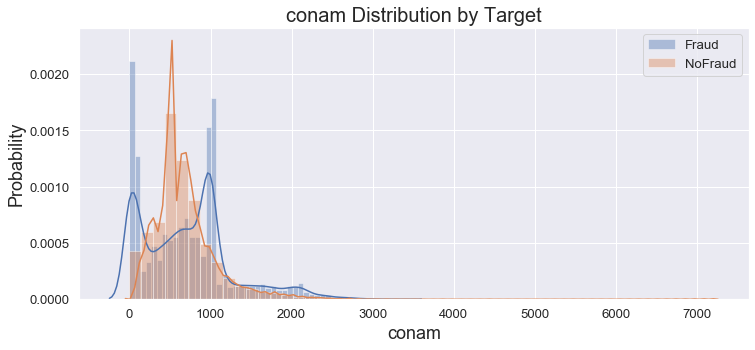

In [61]:
compare_distribution(train,'conam','fraud_ind',dict)

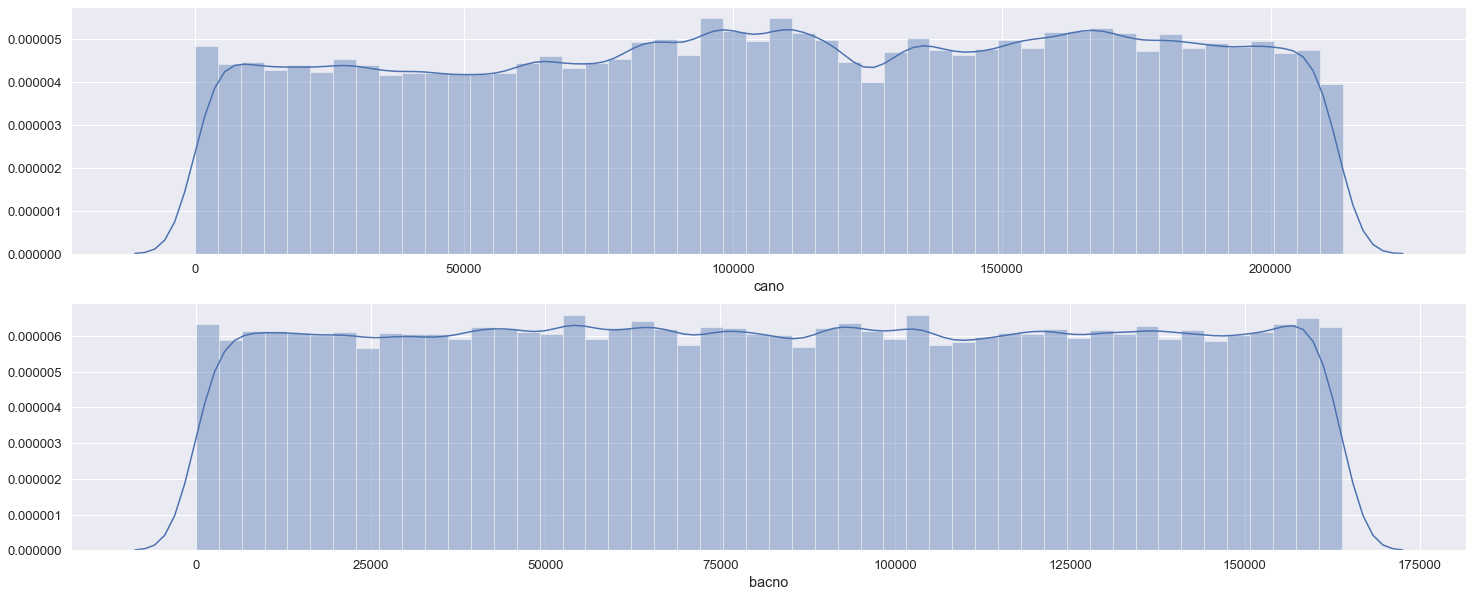

In [62]:
fig, axes = plt.subplots(2, 1, figsize=(25, 10))
cano = sns.distplot(train.cano, ax=axes[0])
bacno = sns.distplot(train.bacno, ax=axes[1])

In [63]:
corr1('cano')

In [64]:
corr1('bacno')

In [65]:
def date_time_split(dataframe):
    dataframe['locdt_M'] = dataframe['locdt'].map({1:1,2:1,3:1,4:1,5:1,6:1,7:1,8:1,9:1,10:1,11:1,12:1,13:1,14:1,15:1,
                                                   16:1,17:1,18:1,19:1,20:1,21:1,22:1,23:1,24:1,25:1,26:1,27:1,28:1,29:1,30:1,31:1,
                                                   32:2,33:2,34:2,35:2,36:2,37:2,38:2,39:2,40:2,41:2,42:2,43:2,44:2,45:2,
                                                   46:2,47:2,48:2,49:2,50:2,51:2,52:2,53:2,54:2,55:2,56:2,57:2,58:2,59:2,60:2,61:2,
                                                   62:3,63:3,64:3,65:3,66:3,67:3,68:3,69:3,70:3,71:3,72:3,73:3,74:3,75:3,
                                                   76:3,77:3,78:3,79:3,80:3,81:3,82:3,83:3,84:3,85:3,86:3,87:3,88:3,89:3,90:3,91:3,92:3,
                                                   93:4,94:4,95:4,96:4,97:4,98:4,99:4,100:4,101:4,102:4,103:4,104:4,105:4,106:4,107:4,
                                                   108:4,109:4,110:4,111:4,112:4,113:4,114:4,115:4,116:4,117:4,118:4,119:4,120:4})
    
    dataframe['locdt_W'] = dataframe['locdt'].map({1:1,2:1,3:1,4:1,5:1,6:1,7:1,
                                                   8:2,9:2,10:2,11:2,12:2,13:2,14:2,
                                                   15:3,16:3,17:3,18:3,19:3,20:3,21:3,
                                                   22:4,23:4,24:4,25:4,26:4,27:4,28:4,
                                                   29:5,30:5,31:5,32:5,33:5,34:5,35:5,
                                                   36:6,37:6,38:6,39:6,40:6,41:6,42:6,
                                                   43:7,44:7,45:7,46:7,47:7,48:7,49:7,
                                                   50:8,51:8,52:8,53:8,54:8,55:8,56:8,
                                                   57:9,58:9,59:9,60:9,61:9,62:9,63:9,
                                                   64:10,65:10,66:10,67:10,68:10,69:10,70:10,
                                                   71:11,72:11,73:11,74:11,75:11,76:11,77:11,
                                                   78:12,79:12,80:12,81:12,82:12,83:12,84:12,
                                                   85:13,86:13,87:13,88:13,89:13,90:13,91:13,
                                                   92:14,93:14,94:14,95:14,96:14,97:14,98:14,
                                                   99:15,100:15,101:15,102:15,103:15,104:15,105:15,
                                                   106:16,107:16,108:16,109:16,110:16,111:16,112:16,
                                                   113:17,114:17,115:17,116:17,117:17,118:17,119:17,
                                                   120:18})
    
    dataframe['loct_hour'] = (dataframe['loctm']//10000).astype(int)
    gc.collect()
    
    return dataframe

train = date_time_split(train)
test = date_time_split(test)

   locdt_M   count   sum      mean
0        1  533805  6656  0.012469
1        2  497436  8765  0.017620
2        3  490546  4934  0.010058


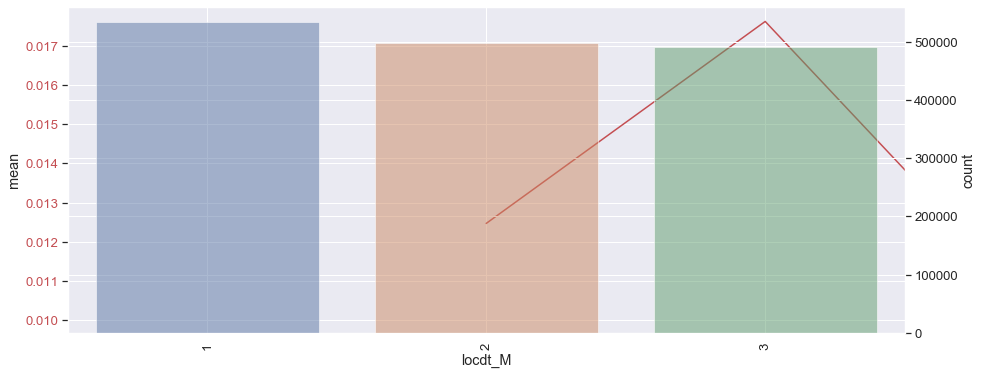

In [66]:
compare_cate(train,'locdt_M','fraud_ind')

    loct_hour   count   sum      mean
0           0   26882  1125  0.041850
1           1   16051   937  0.058376
2           2   14547  1016  0.069843
3           3    9386   771  0.082144
4           4    7408   672  0.090713
5           5    7635   514  0.067322
6           6   12374   478  0.038629
7           7   28137   445  0.015815
8           8   49078   416  0.008476
9           9   75814   635  0.008376
10         10  119396   799  0.006692
11         11   86642   750  0.008656
12         12   90399   746  0.008252
13         13   94667   849  0.008968
14         14   97195   879  0.009044
15         15  100479   972  0.009674
16         16  101803   871  0.008556
17         17  105041  1097  0.010444
18         18  100791   948  0.009406
19         19  100801   956  0.009484
20         20  101042  1124  0.011124
21         21   83263  1137  0.013656
22         22   53641  1054  0.019649
23         23   39315  1164  0.029607


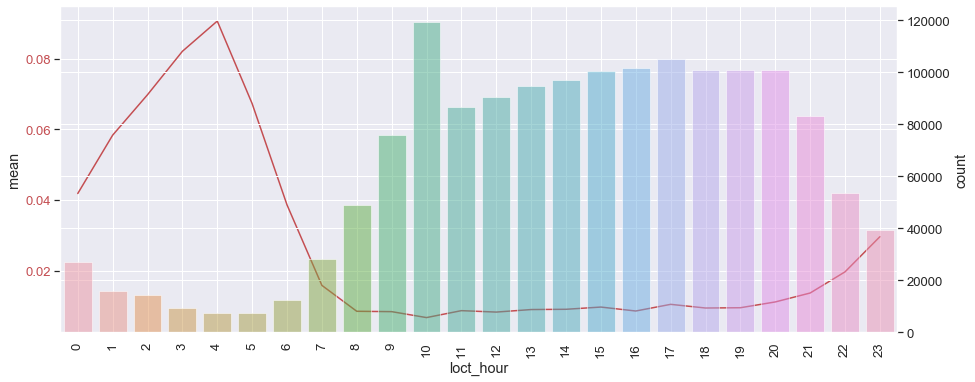

In [67]:
compare_cate(train,'loct_hour','fraud_ind')

    locdt_W   count   sum      mean
0         1  117308  1381  0.011772
1         2  120990  1316  0.010877
2         3  121268  1555  0.012823
3         4  119460  1789  0.014976
4         5  120683  2422  0.020069
5         6  109866  2351  0.021399
6         7  118351  2047  0.017296
7         8  116938  1596  0.013648
8         9  119816  1443  0.012043
9        10  119731  1271  0.010615
10       11  126968  1182  0.009309
11       12  109337   970  0.008872
12       13  101071  1032  0.010211


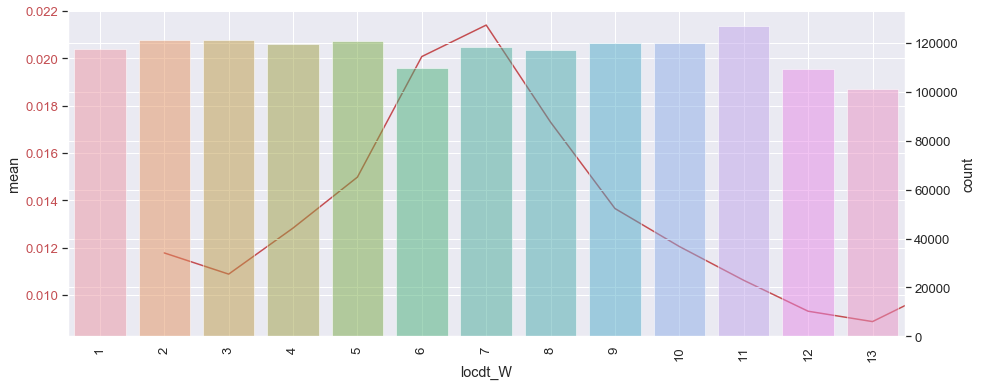

In [68]:
compare_cate(train,'locdt_W','fraud_ind')

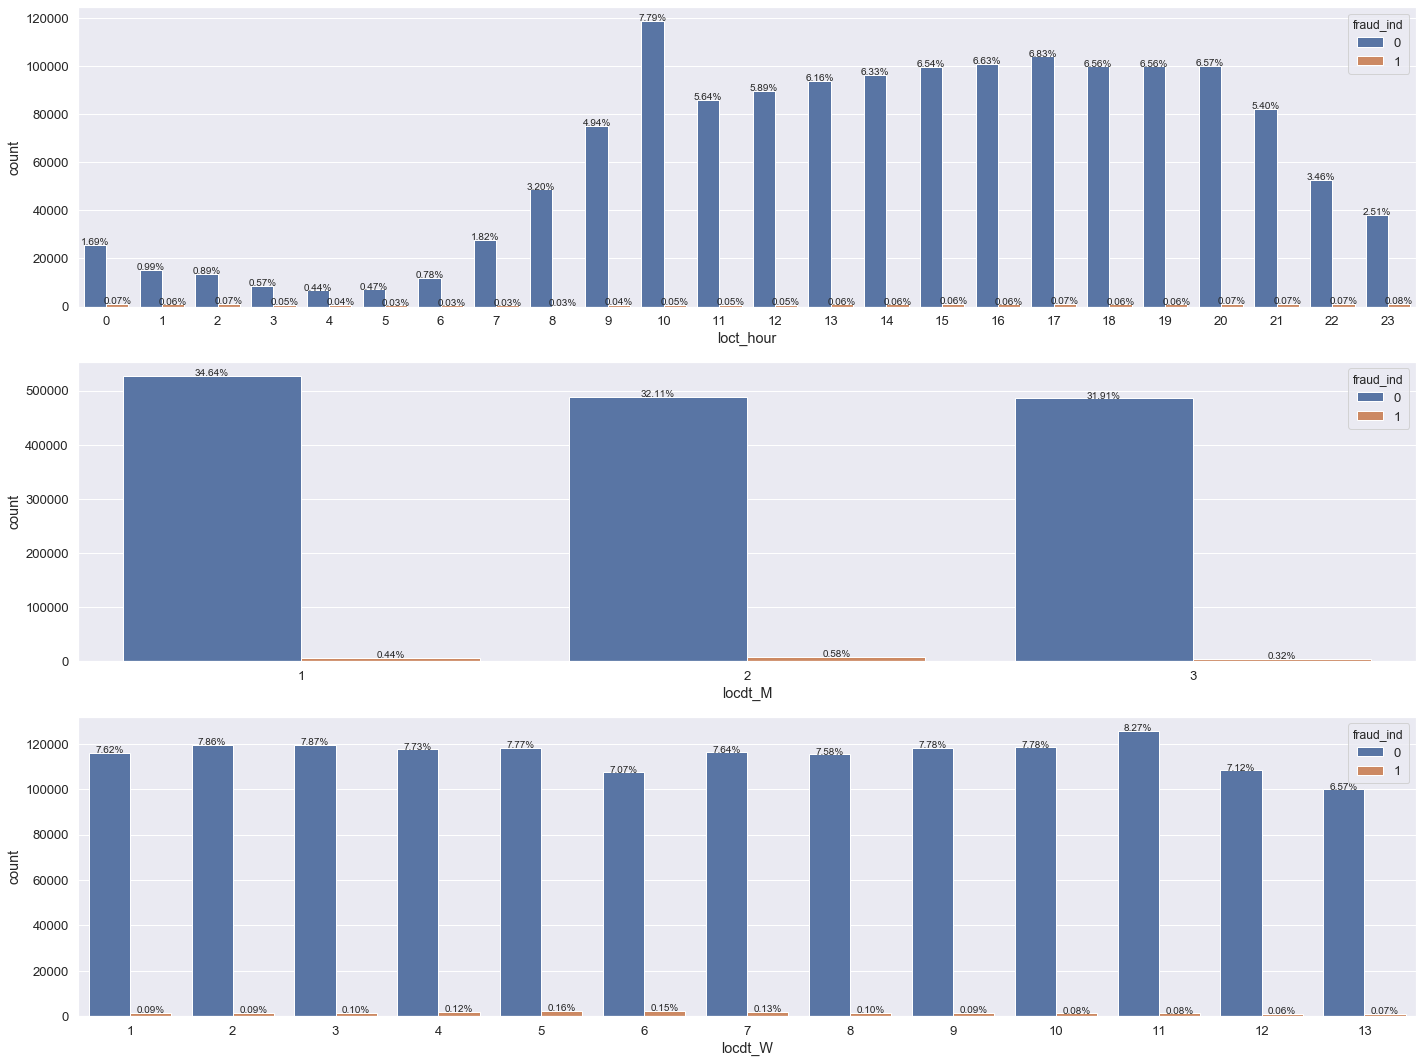

In [70]:
fig, axes = plt.subplots(3, 1, figsize=(20, 15))
loct_hour = sns.countplot(x='loct_hour', data=train, hue=train['fraud_ind'], ax=axes[0])
GetPercentage(loct_hour)
locdt_M = sns.countplot(x='locdt_M', data=train, hue=train['fraud_ind'], ax=axes[1])
GetPercentage(locdt_M)
locdt_W = sns.countplot(x='locdt_W', data=train, hue=train['fraud_ind'], ax=axes[2])
GetPercentage(locdt_W)
plt.tight_layout()

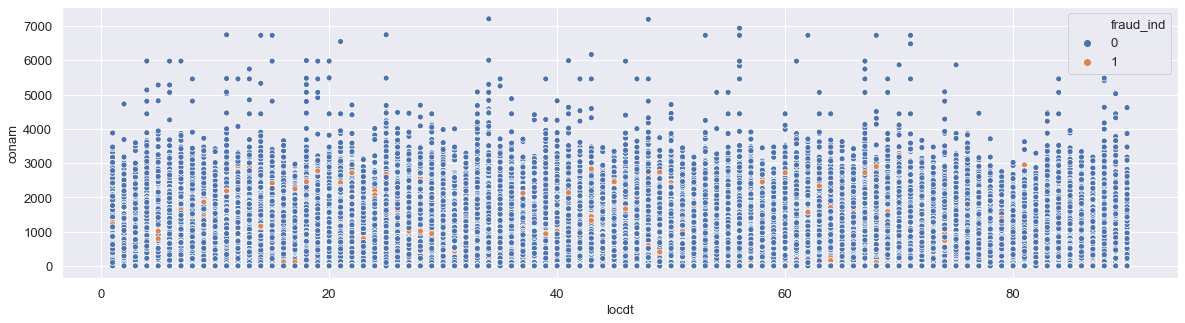

In [71]:
plt.figure(figsize=(20, 5))
amount_scatter = sns.scatterplot(x = 'locdt', y = 'conam', hue='fraud_ind', data=train)
plt.ylabel('conam', fontsize=13)
plt.xlabel('locdt', fontsize=13)
plt.show()

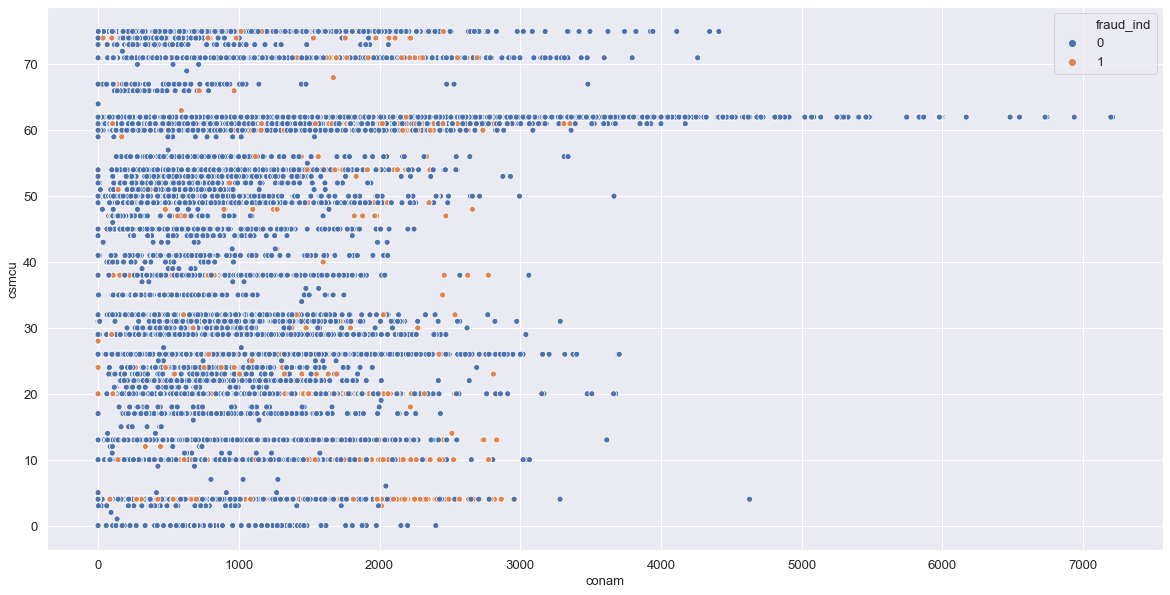

In [72]:
plt.figure(figsize=(20, 10))
amount_scatter = sns.scatterplot(x = 'conam', y = 'csmcu', hue='fraud_ind', data=train)
plt.ylabel('csmcu', fontsize=13)
plt.xlabel('conam', fontsize=13)
plt.show()

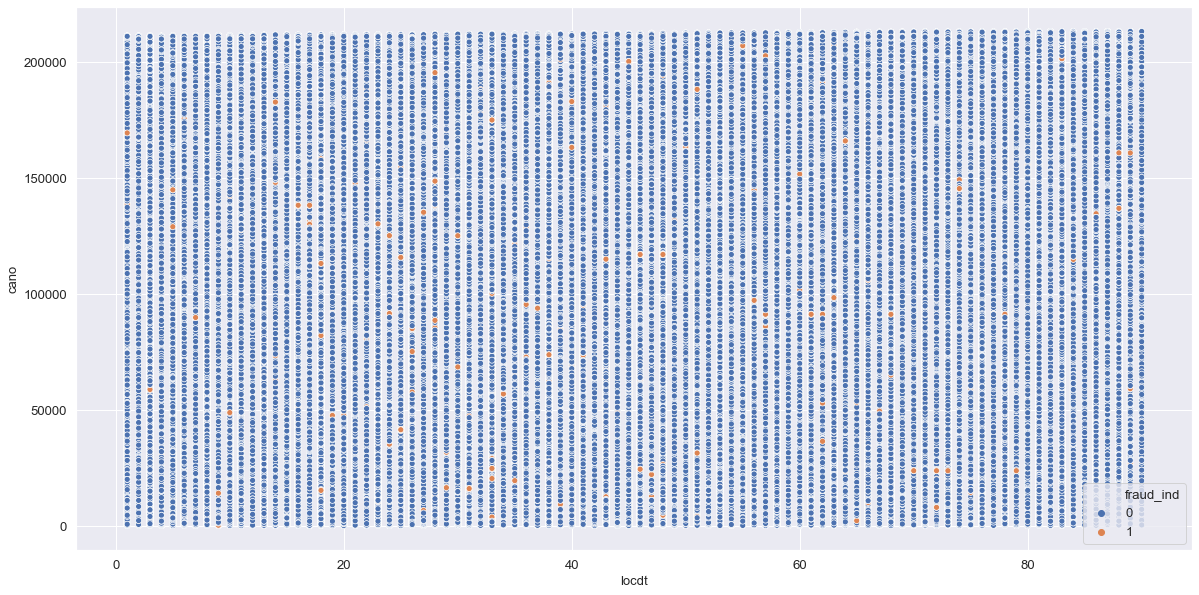

In [73]:
plt.figure(figsize=(20, 10))
cano_scatter = sns.scatterplot(x = 'locdt', y = 'cano', hue='fraud_ind', data=train)
plt.ylabel('cano', fontsize=13)
plt.xlabel('locdt', fontsize=13)
plt.show()

In [74]:
F_train = train[train['fraud_ind']==1]
NF_train = train[train['fraud_ind']==0]

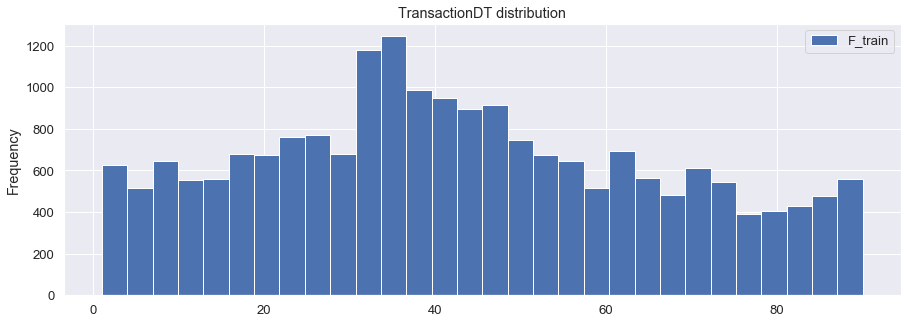

In [75]:
F_train['locdt'].plot(kind='hist',
                    figsize=(15, 5),
                    label='F_train',
                    bins=30,
                    title='TransactionDT distribution')
plt.legend()
plt.show()

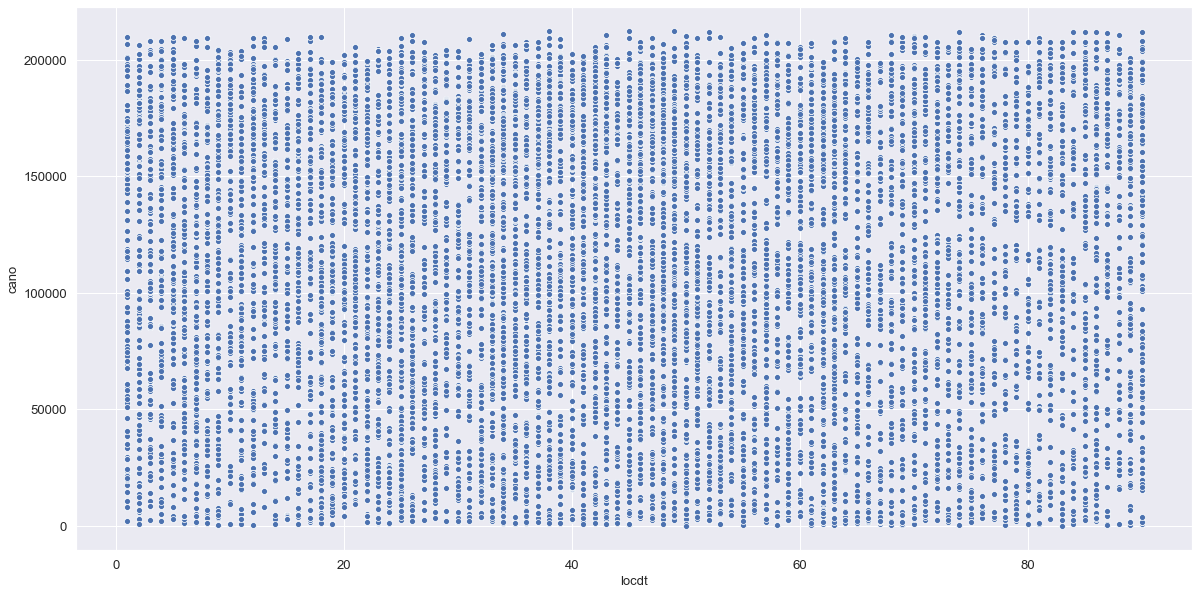

In [76]:
plt.figure(figsize=(20, 10))
cano_scatter = sns.scatterplot(x = 'locdt', y = 'cano', data=F_train)
plt.ylabel('cano', fontsize=13)
plt.xlabel('locdt', fontsize=13)
plt.show()

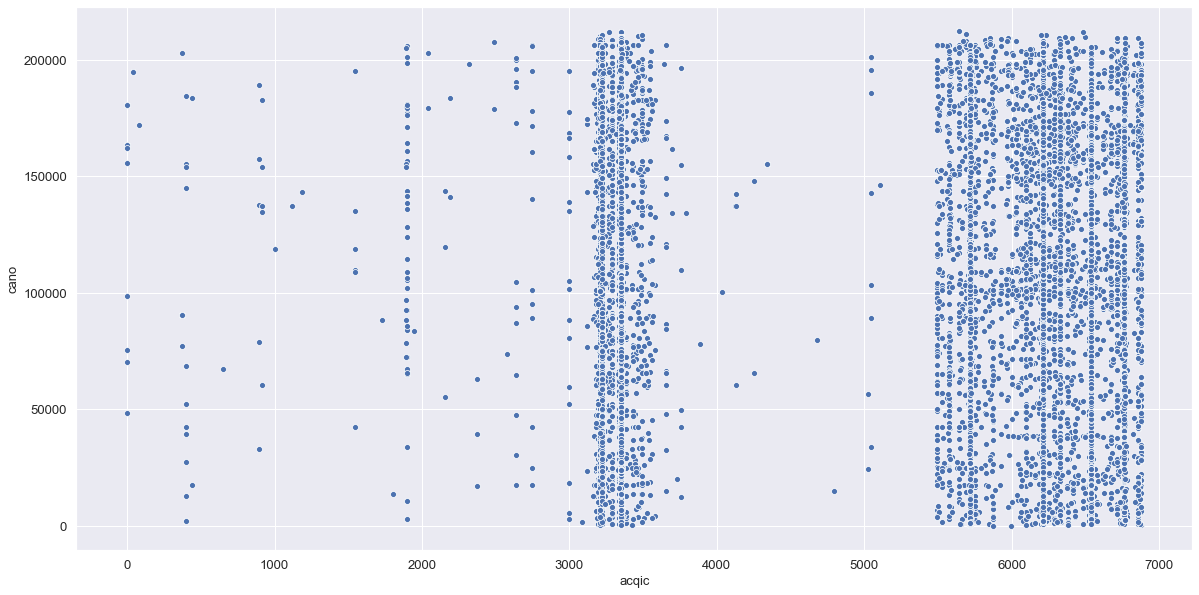

In [77]:
plt.figure(figsize=(20, 10))
cano_scatter = sns.scatterplot(x = 'acqic', y = 'cano', data=F_train)
plt.ylabel('cano', fontsize=13)
plt.xlabel('acqic', fontsize=13)
plt.show()

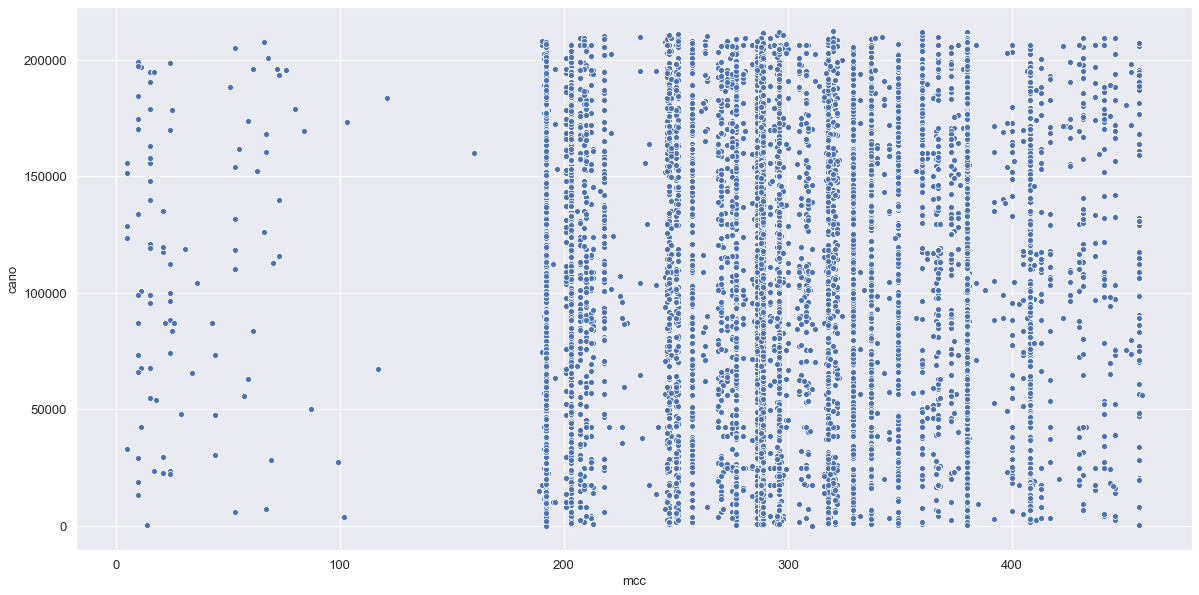

In [78]:
plt.figure(figsize=(20, 10))
cano_scatter = sns.scatterplot(x = 'mcc', y = 'cano', data=F_train)
plt.ylabel('cano', fontsize=13)
plt.xlabel('mcc', fontsize=13)
plt.show()

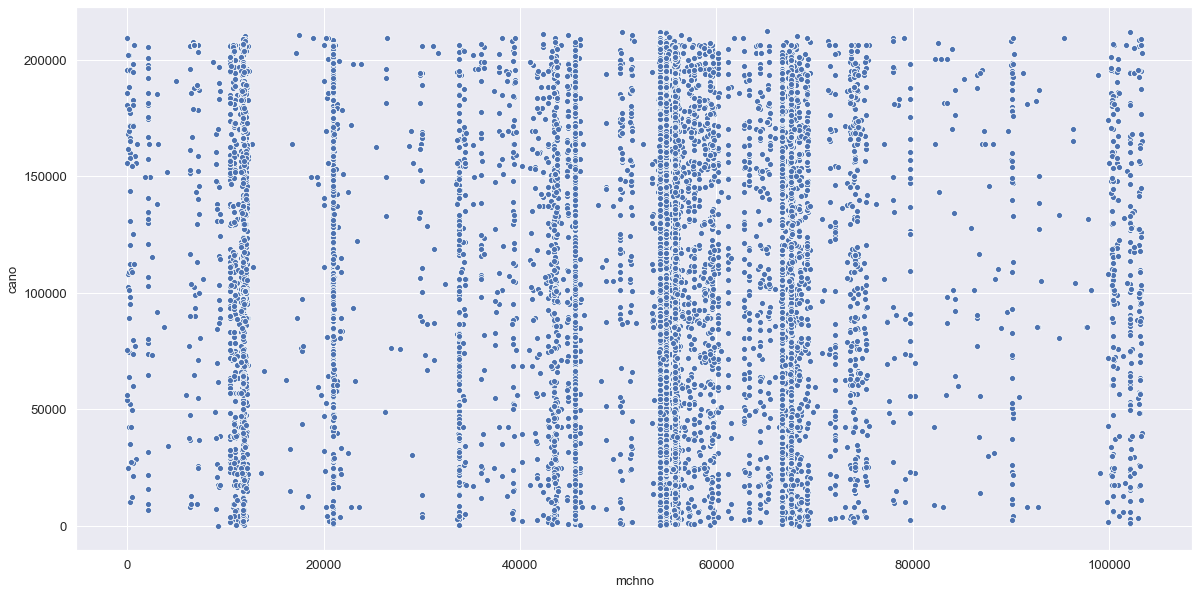

In [79]:
plt.figure(figsize=(20, 10))
cano_scatter = sns.scatterplot(x = 'mchno', y = 'cano', data=F_train)
plt.ylabel('cano', fontsize=13)
plt.xlabel('mchno', fontsize=13)
plt.show()

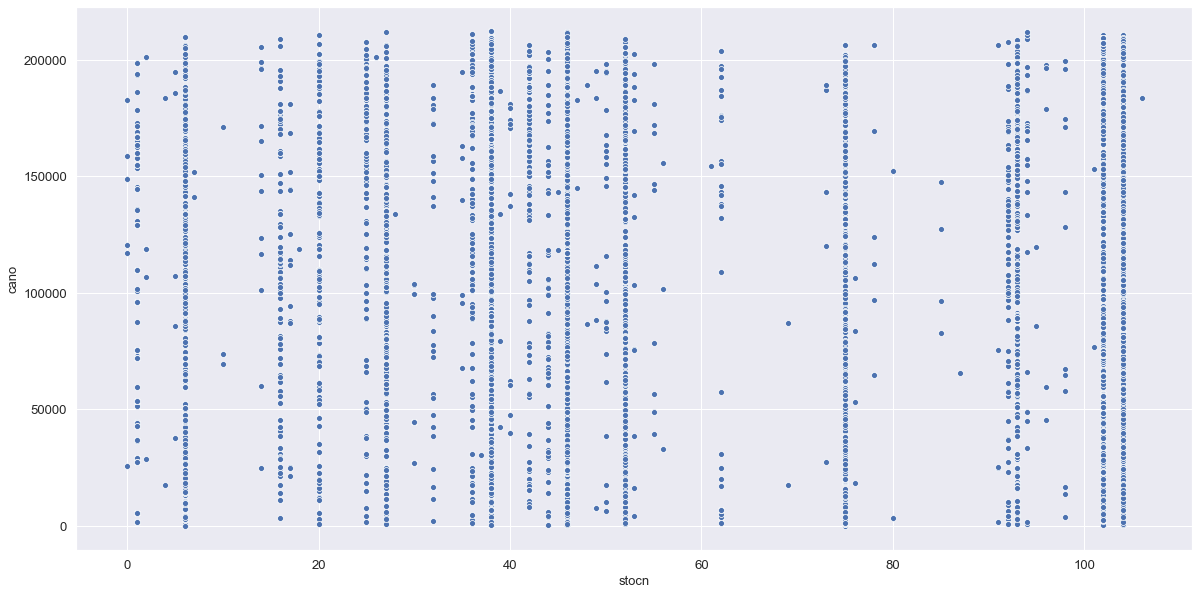

In [80]:
plt.figure(figsize=(20, 10))
cano_scatter = sns.scatterplot(x = 'stocn', y = 'cano', data=F_train)
plt.ylabel('cano', fontsize=13)
plt.xlabel('stocn', fontsize=13)
plt.show()

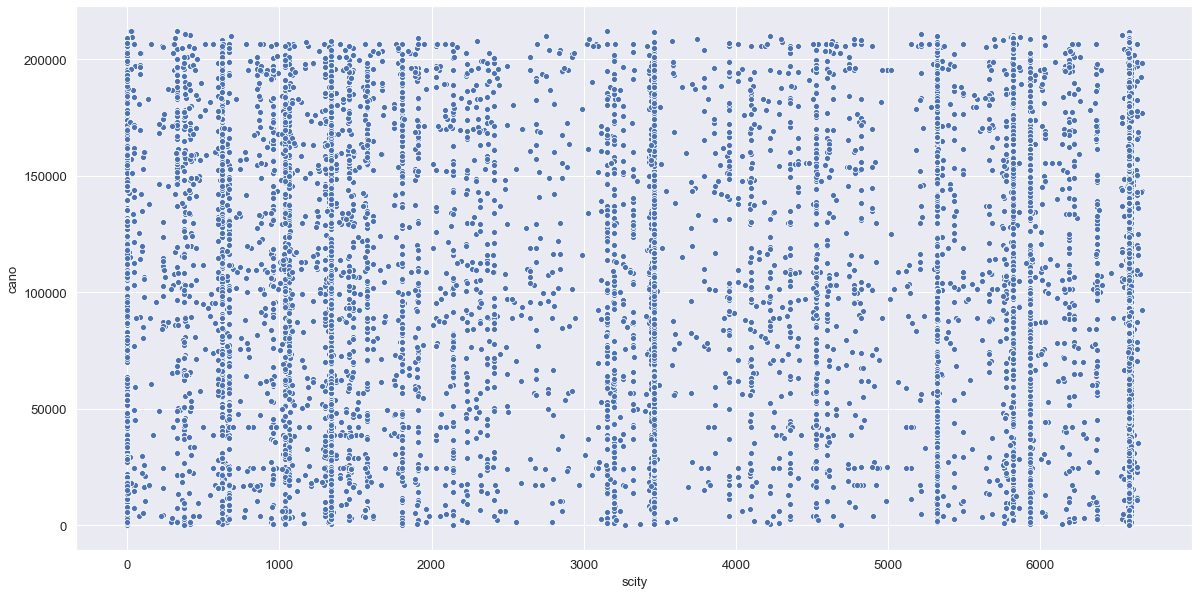

In [81]:
plt.figure(figsize=(20, 10))
cano_scatter = sns.scatterplot(x = 'scity', y = 'cano', data=F_train)
plt.ylabel('cano', fontsize=13)
plt.xlabel('scity', fontsize=13)
plt.show()

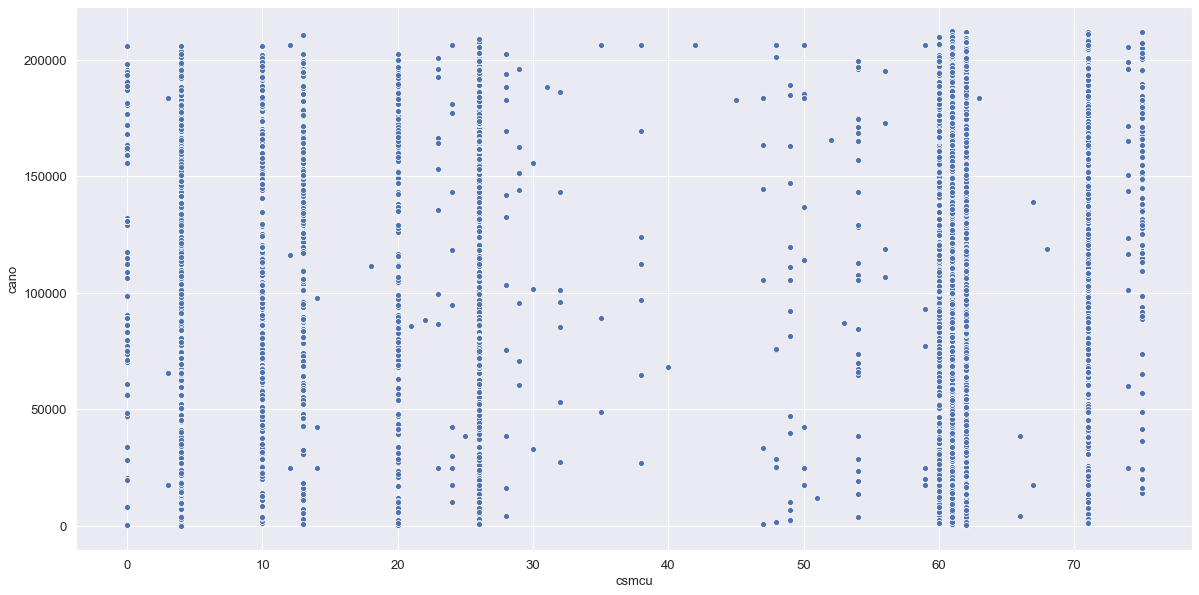

In [82]:
plt.figure(figsize=(20, 10))
cano_scatter = sns.scatterplot(x = 'csmcu', y = 'cano', data=F_train)
plt.ylabel('cano', fontsize=13)
plt.xlabel('csmcu', fontsize=13)
plt.show()